In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import pickle
import seaborn as sns

In [3]:
d = 1000
n= 900
Sigma = np.zeros((d,d)) + np.eye(d)
rho = 0.1
for i in range(d):
    for j in range(i+1, d):
        if (j < i+6) or (j > i+d-6):
            Sigma[i,j] = rho
            Sigma[j,i] = rho
sig = 1

Sigma_inv = np.linalg.inv(Sigma)

Scenario x0, beta0:



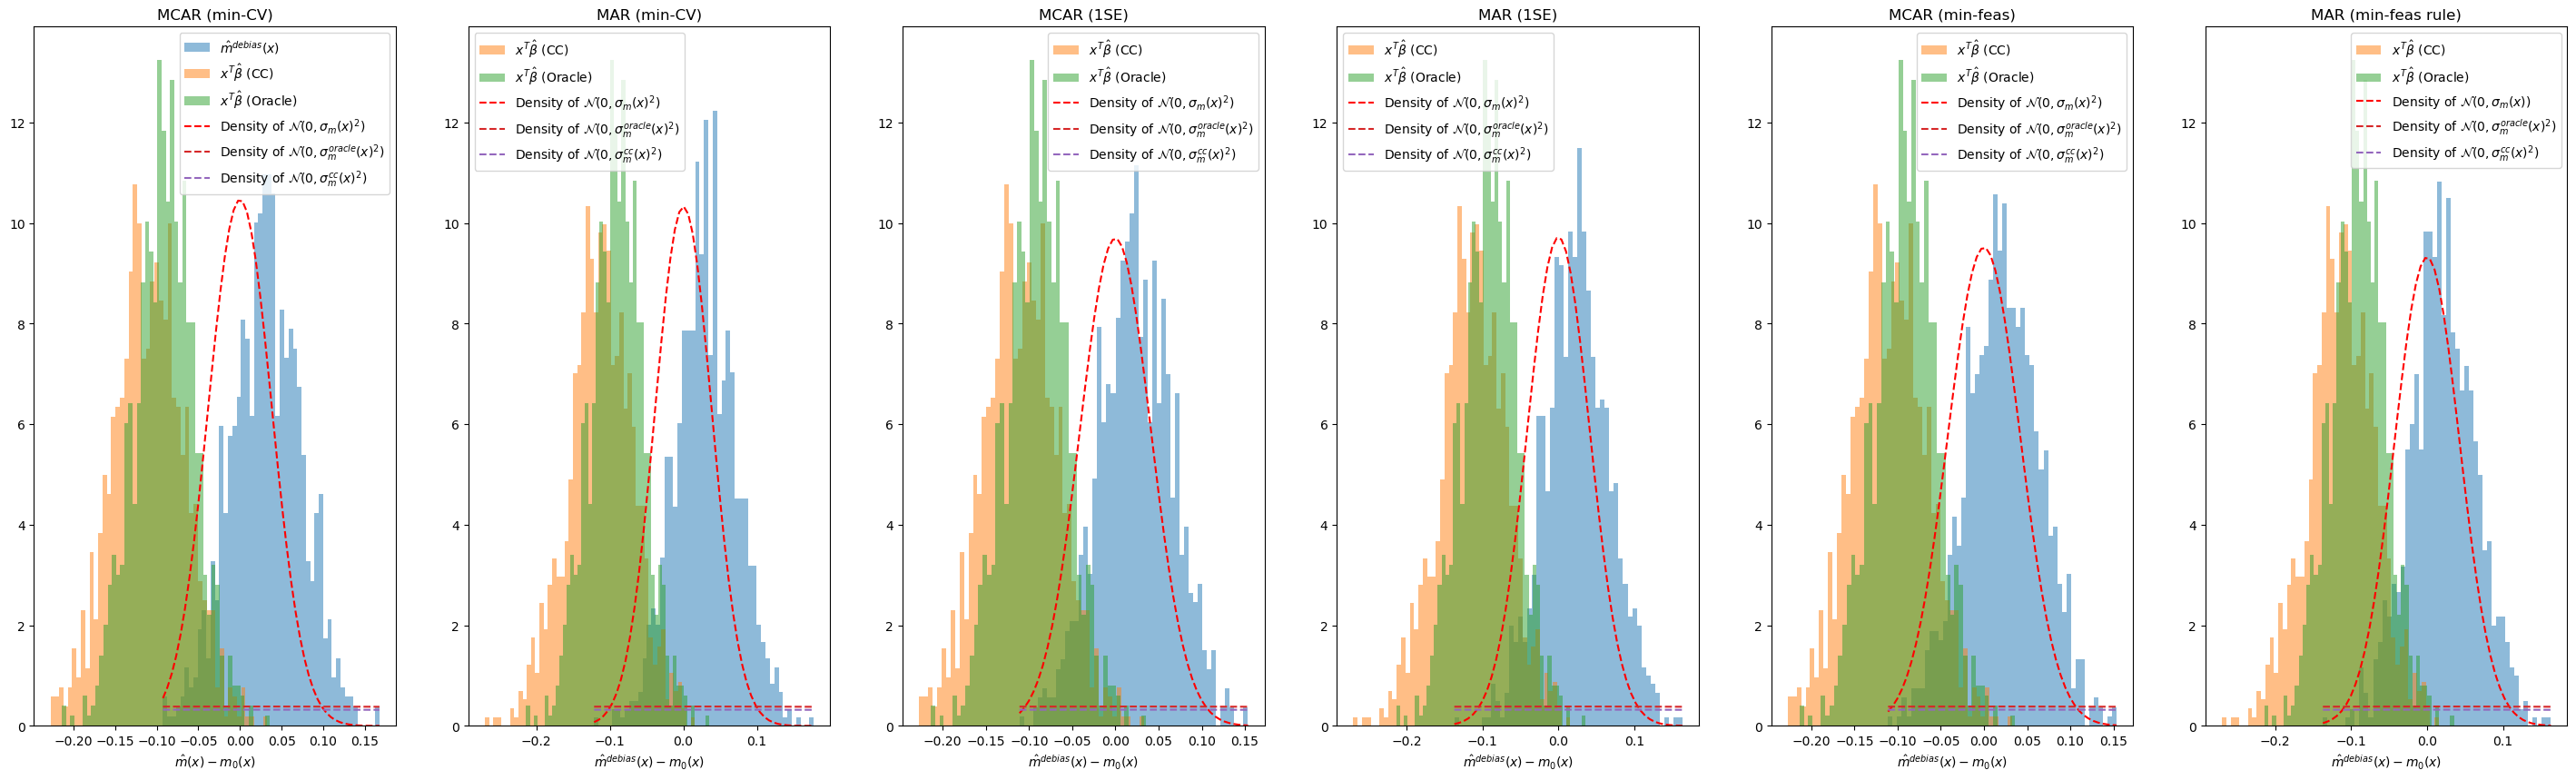

Scenario x0, beta1:



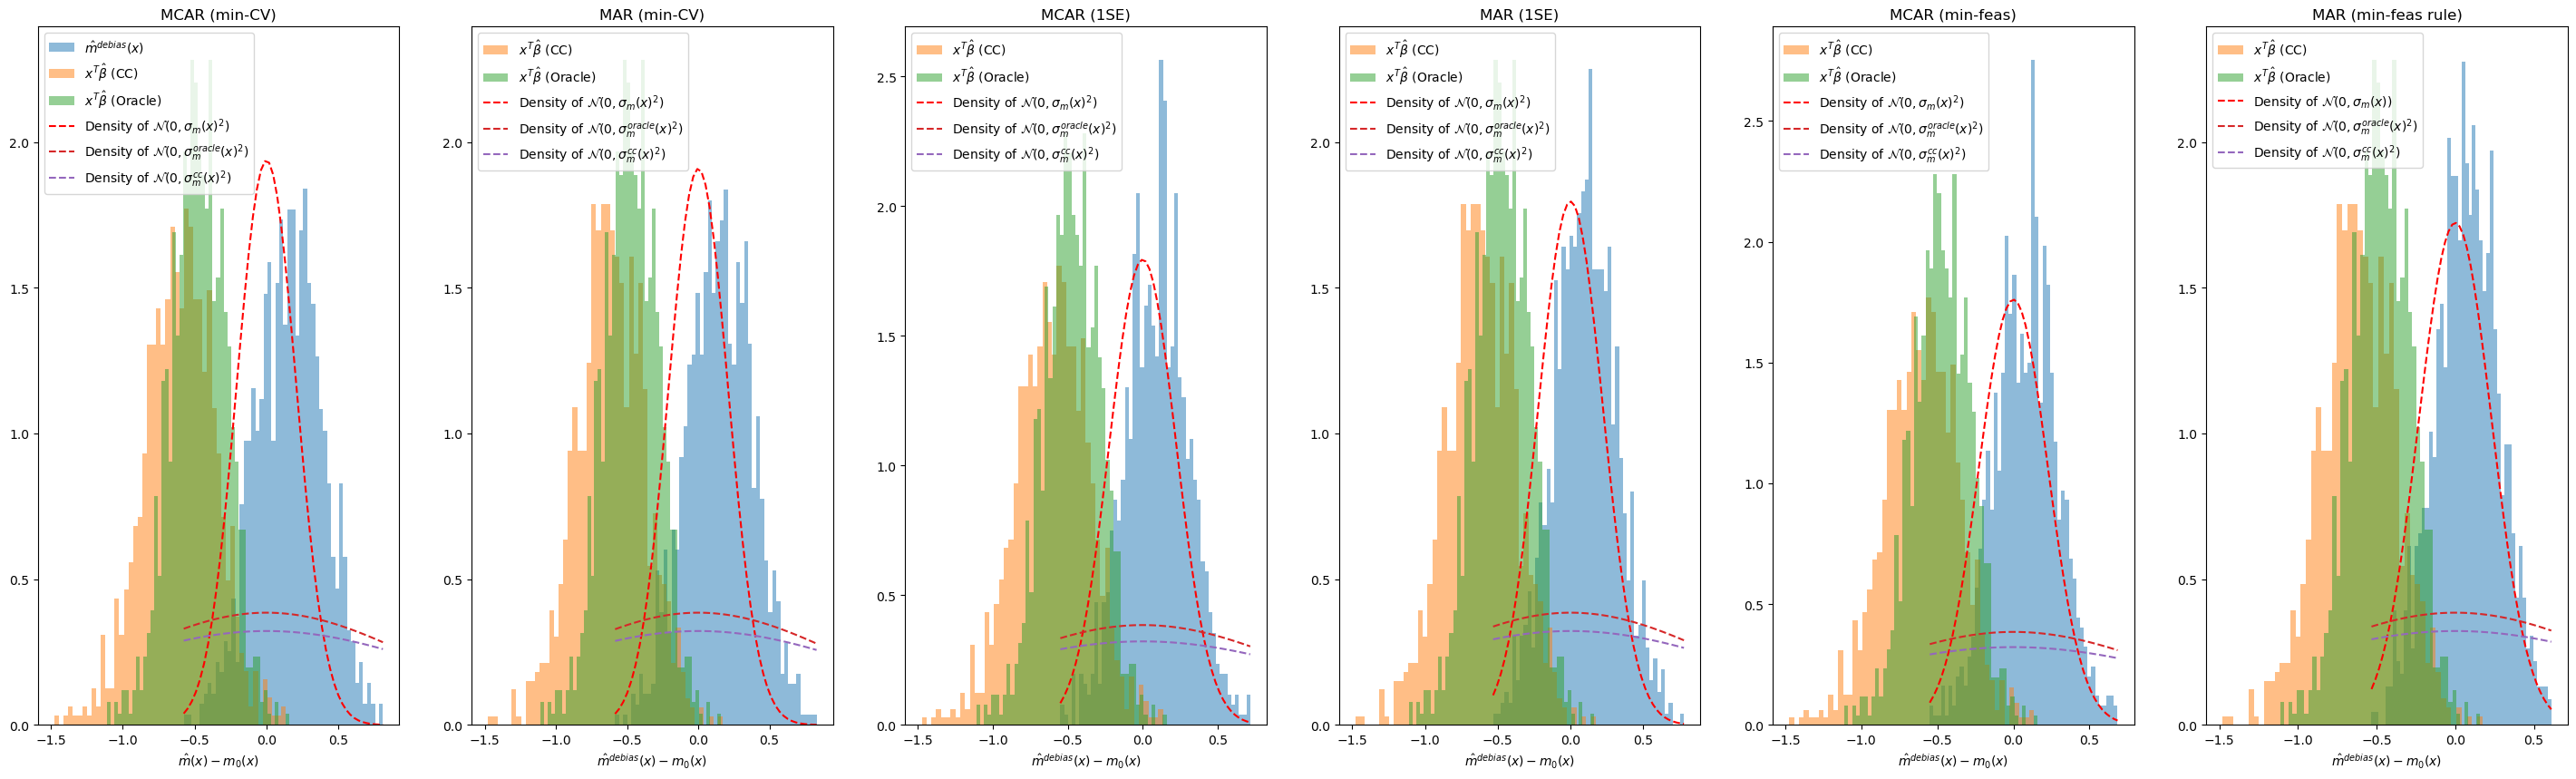

Scenario x0, beta2:



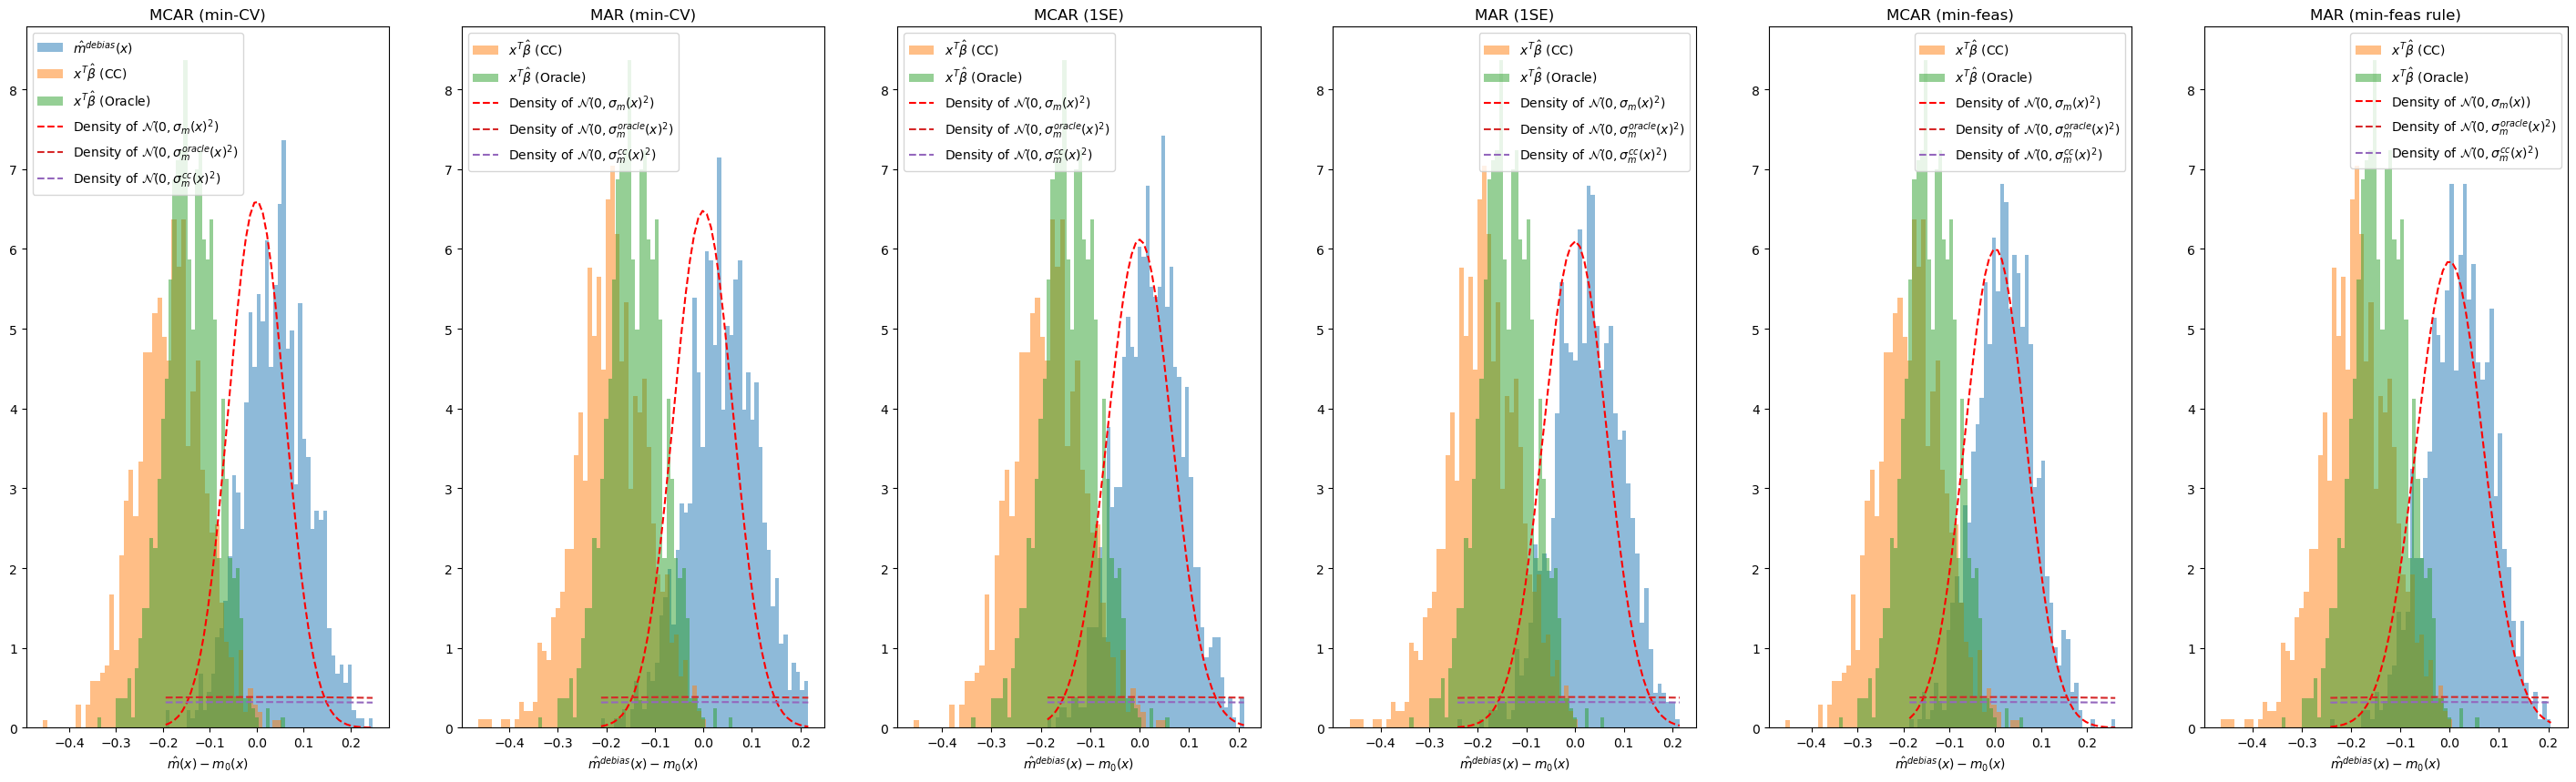

Scenario x1, beta0:



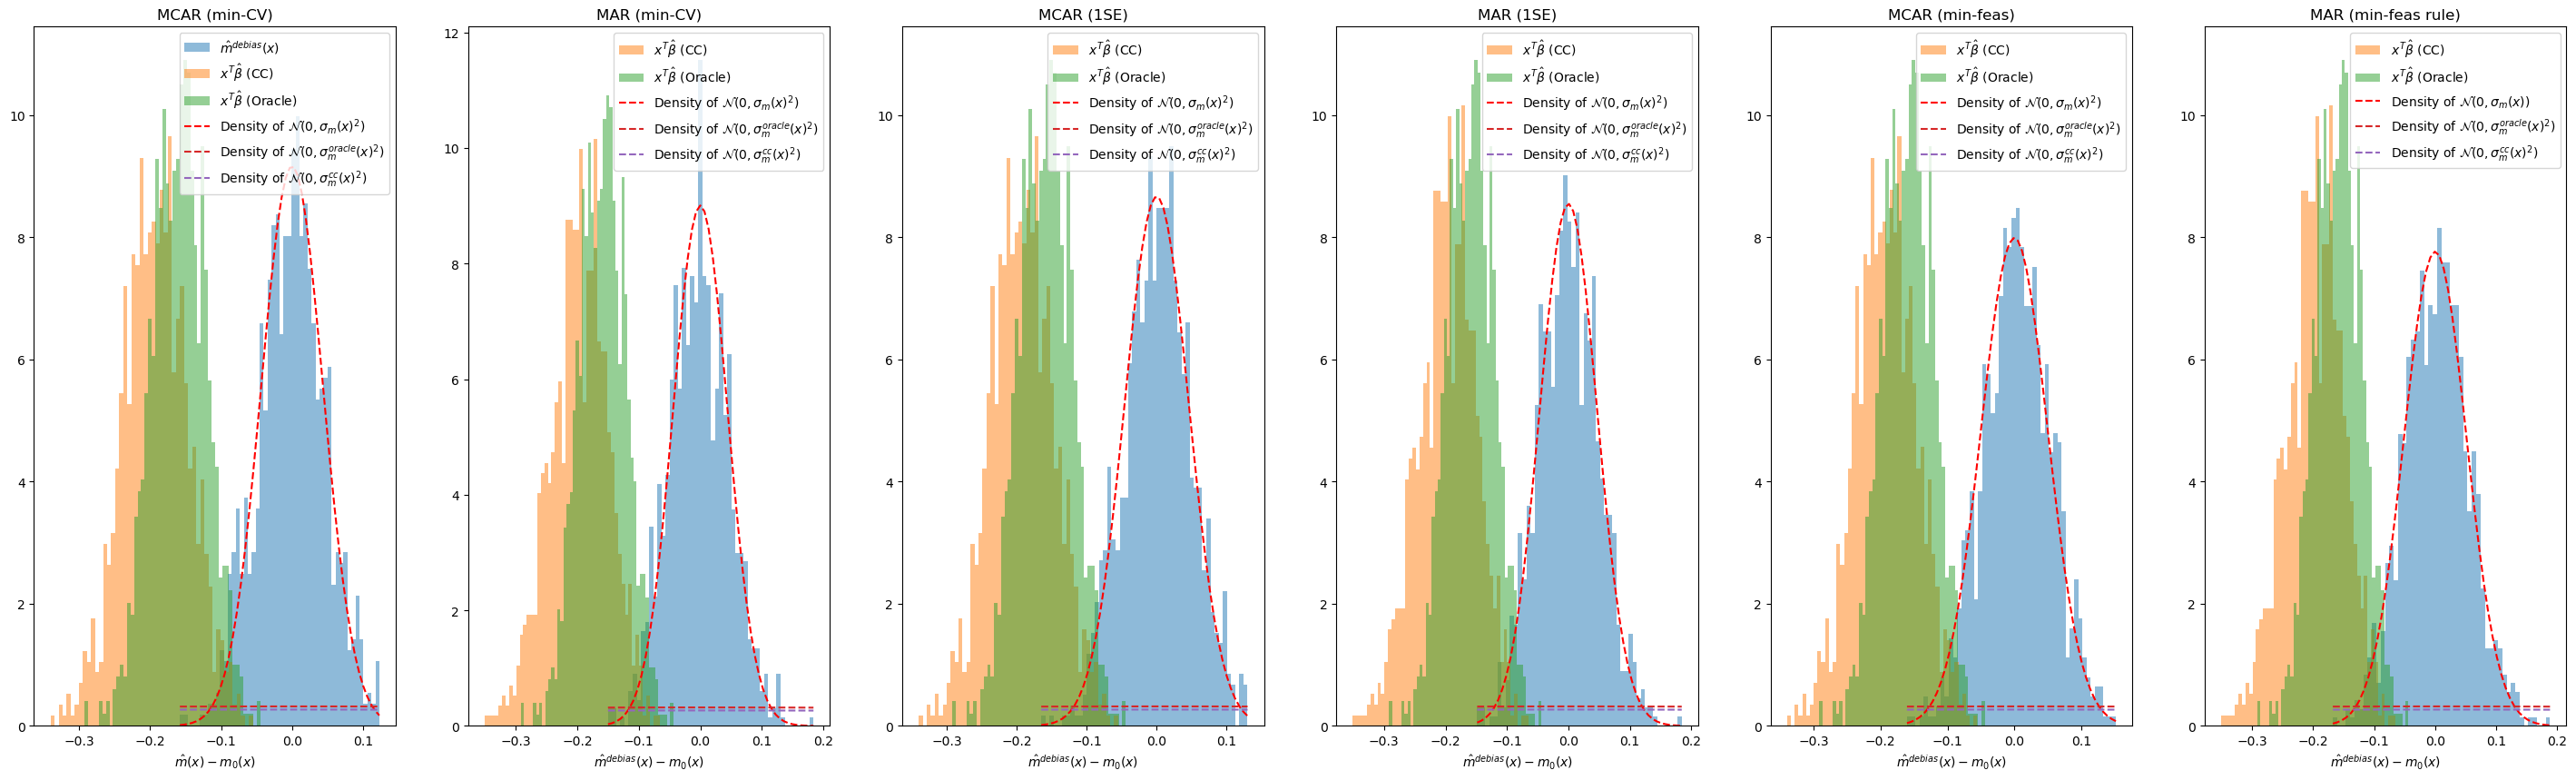

Scenario x1, beta1:



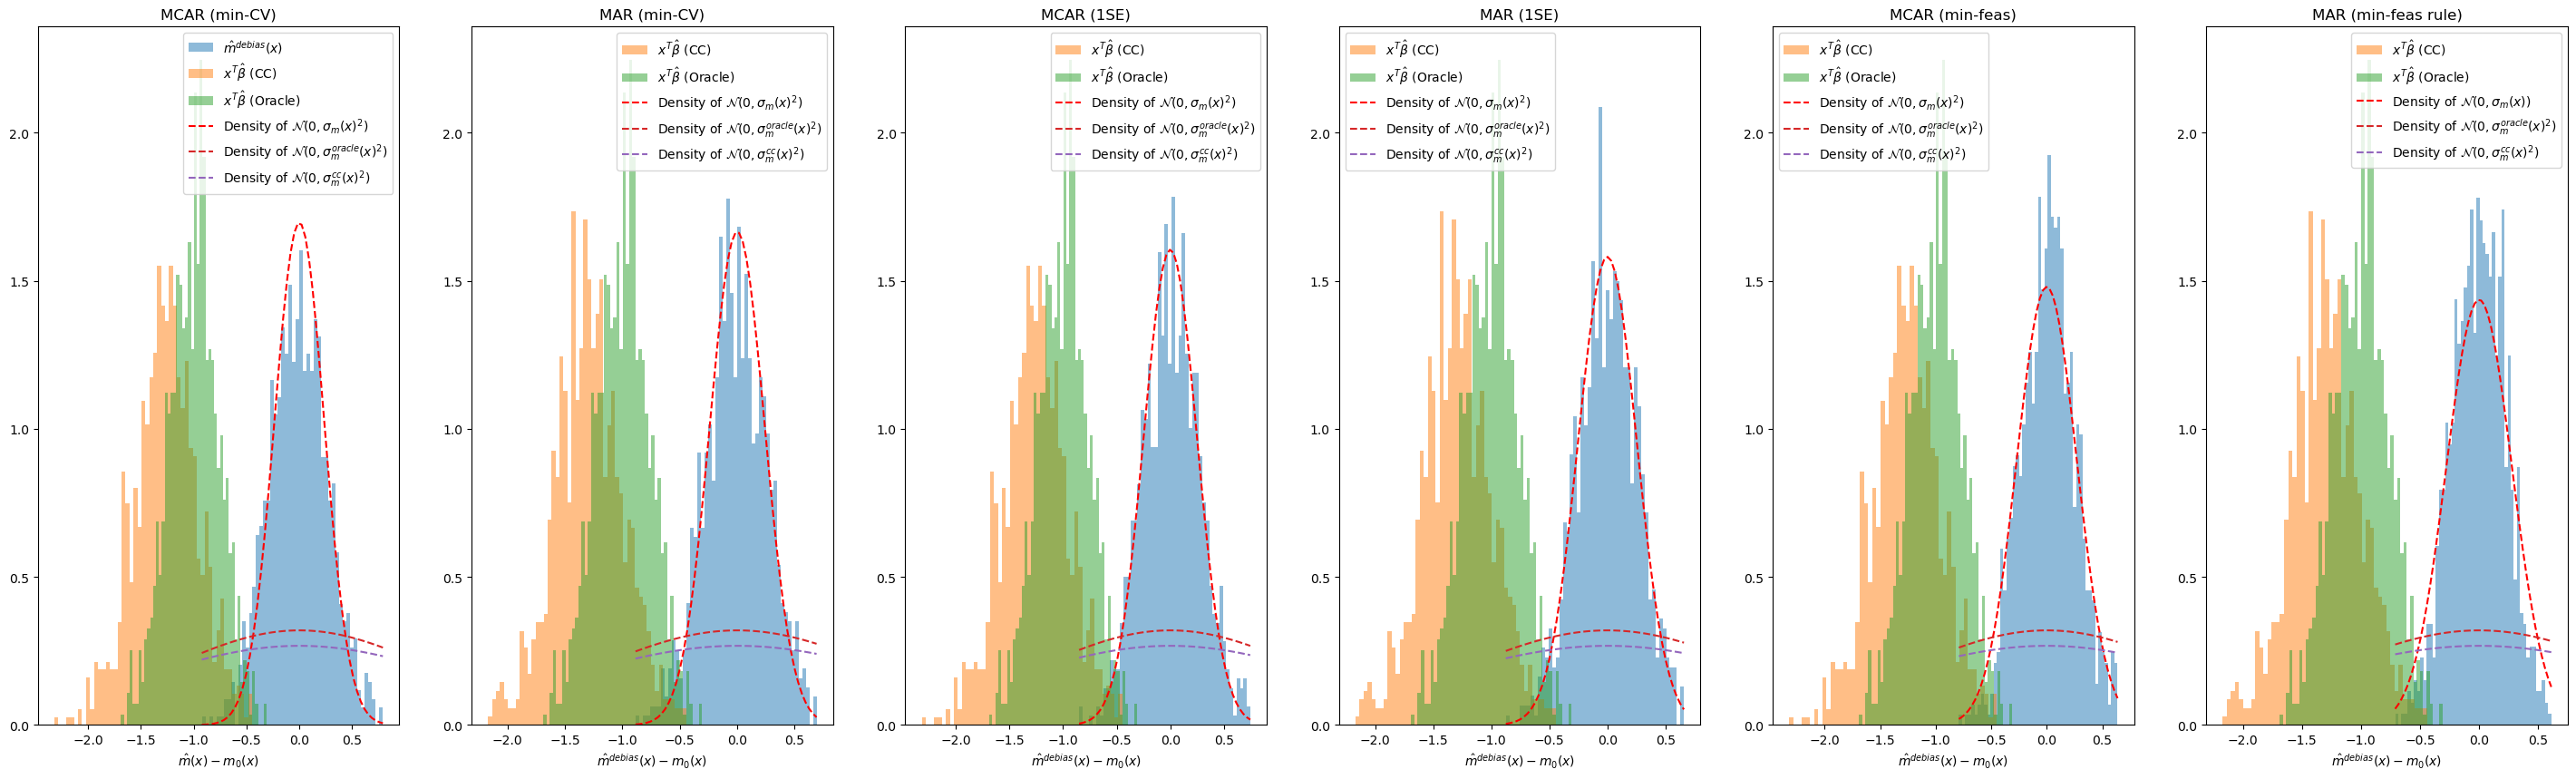

Scenario x1, beta2:



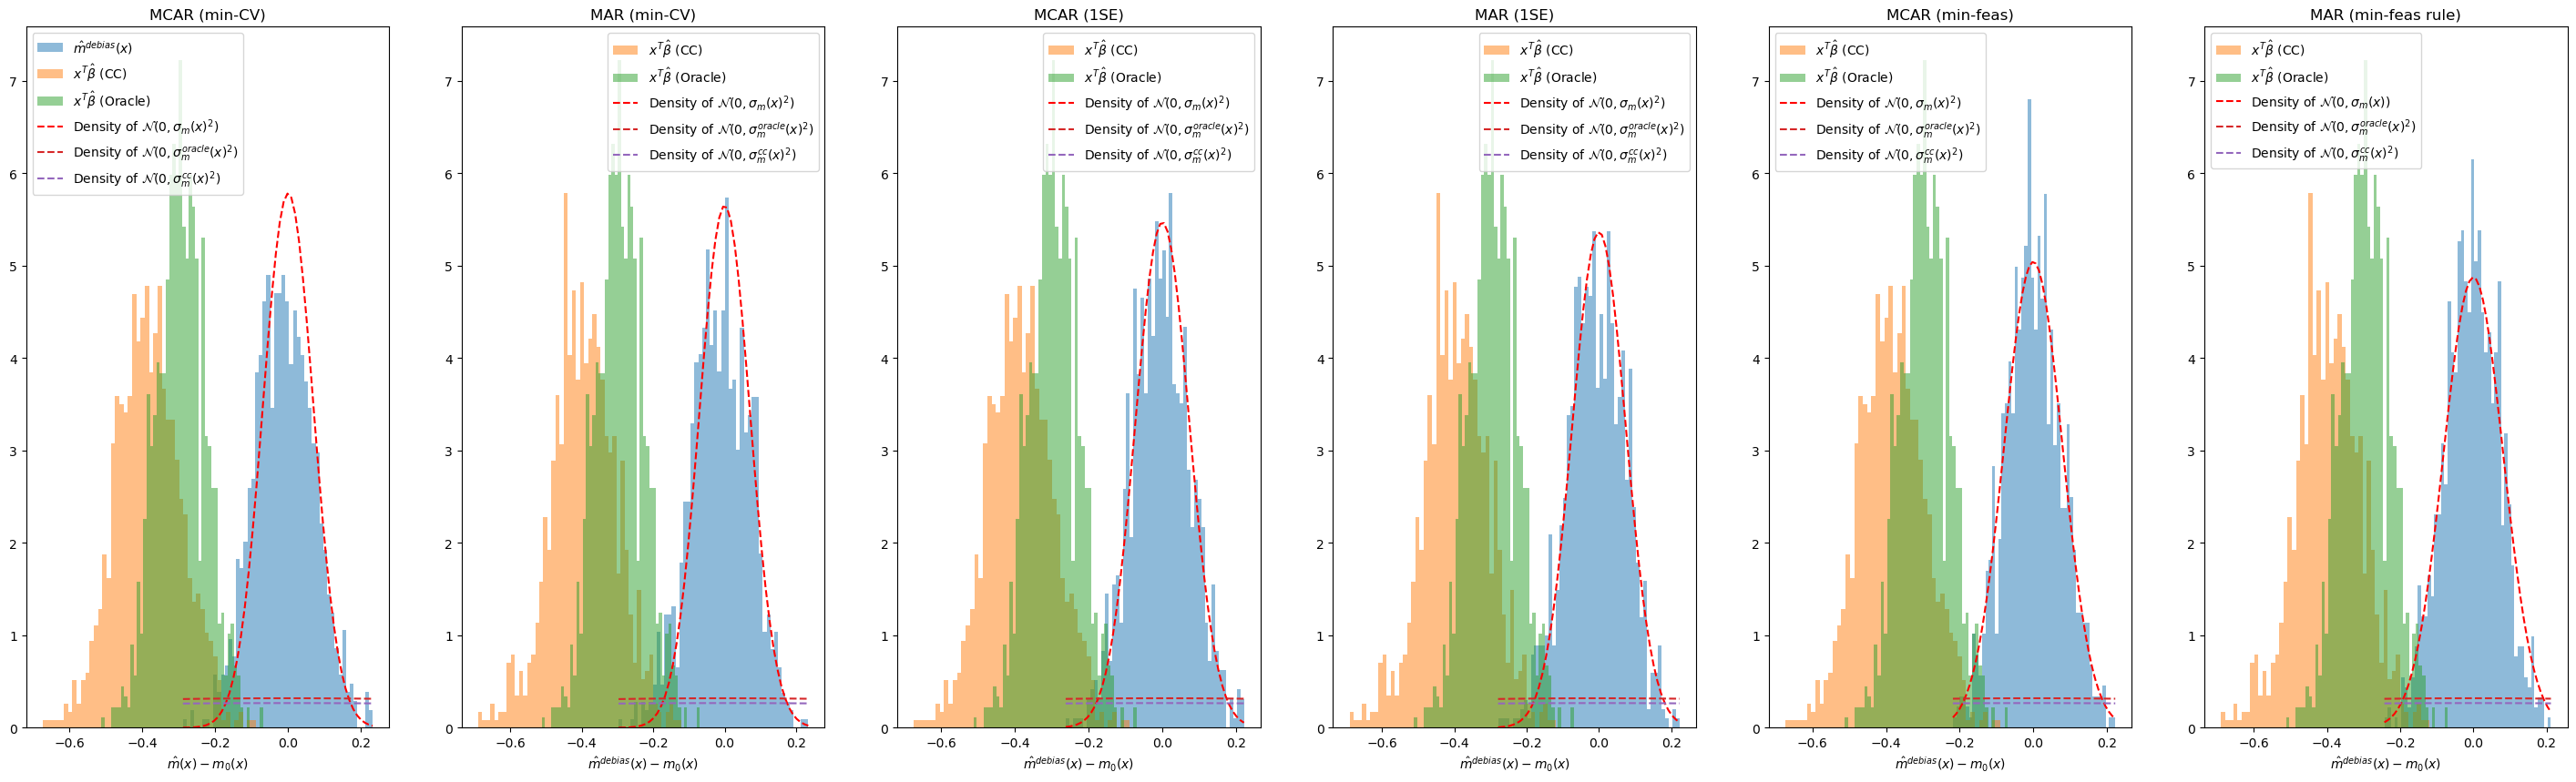

Scenario x2, beta0:



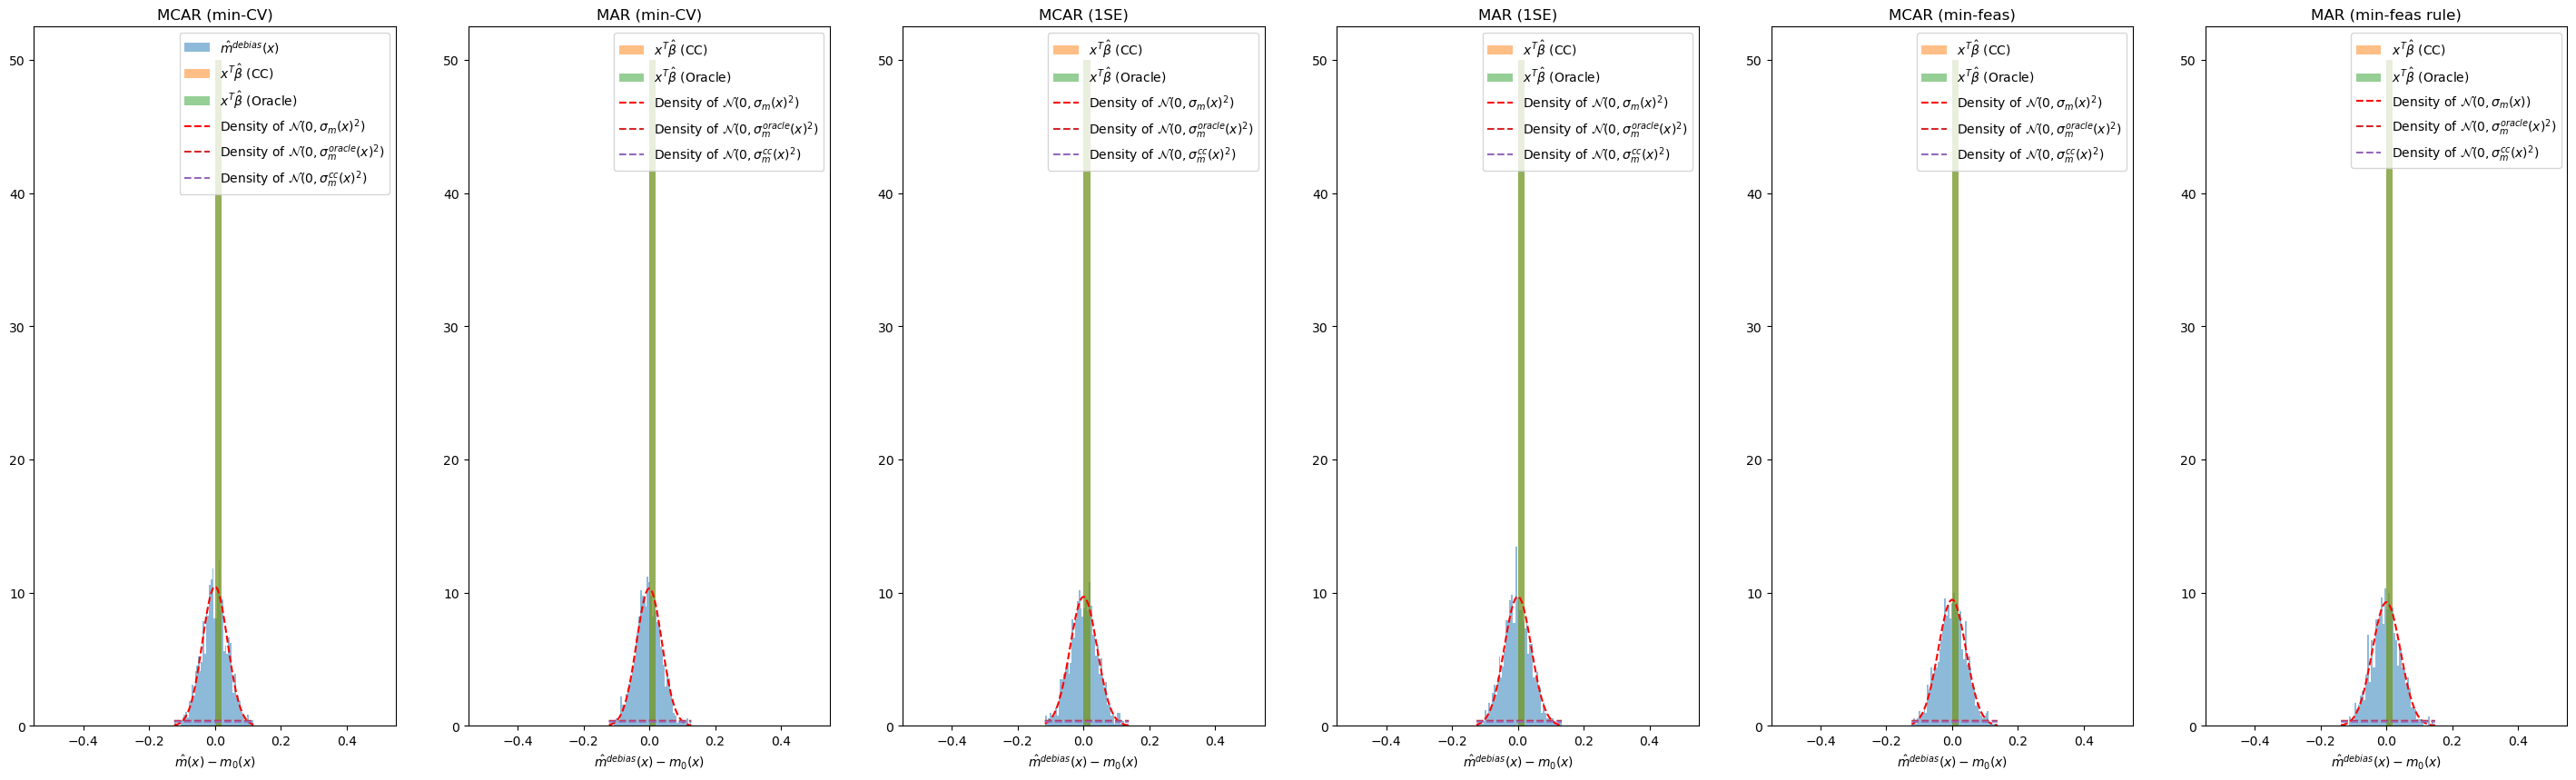

Scenario x2, beta1:



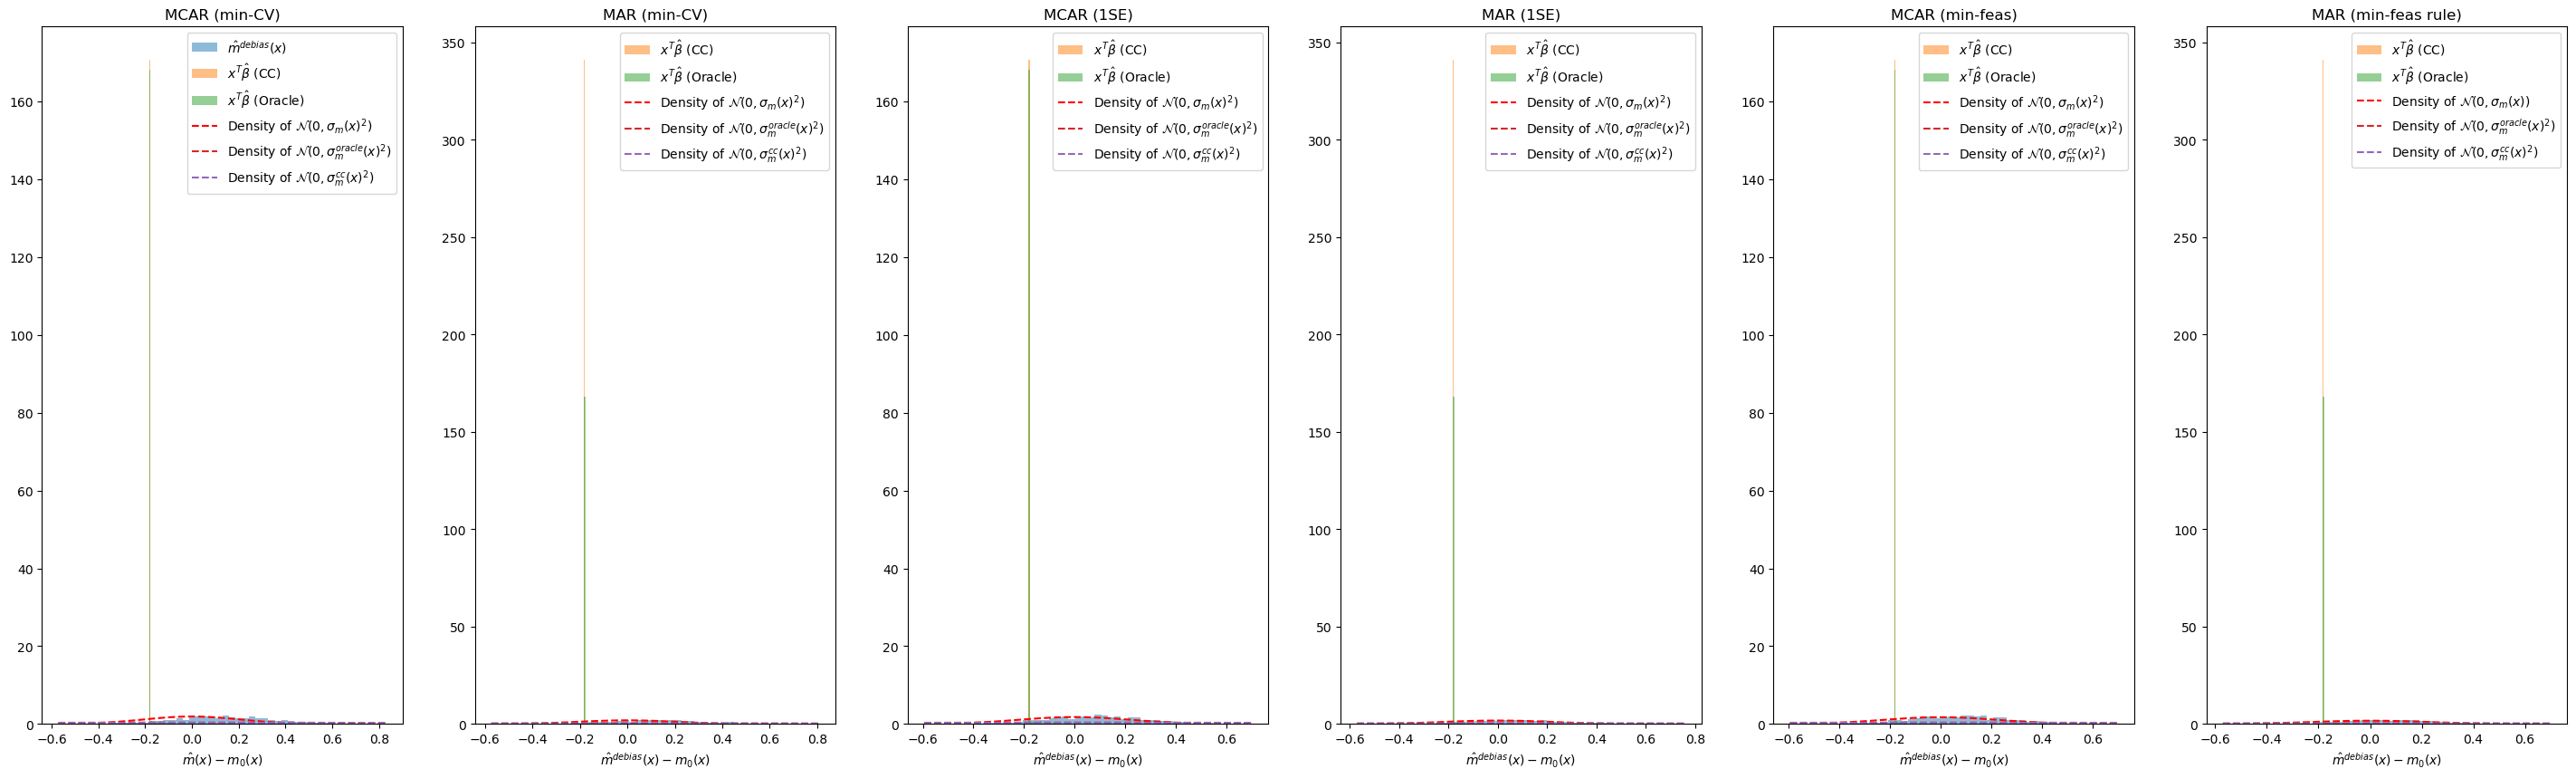

Scenario x2, beta2:



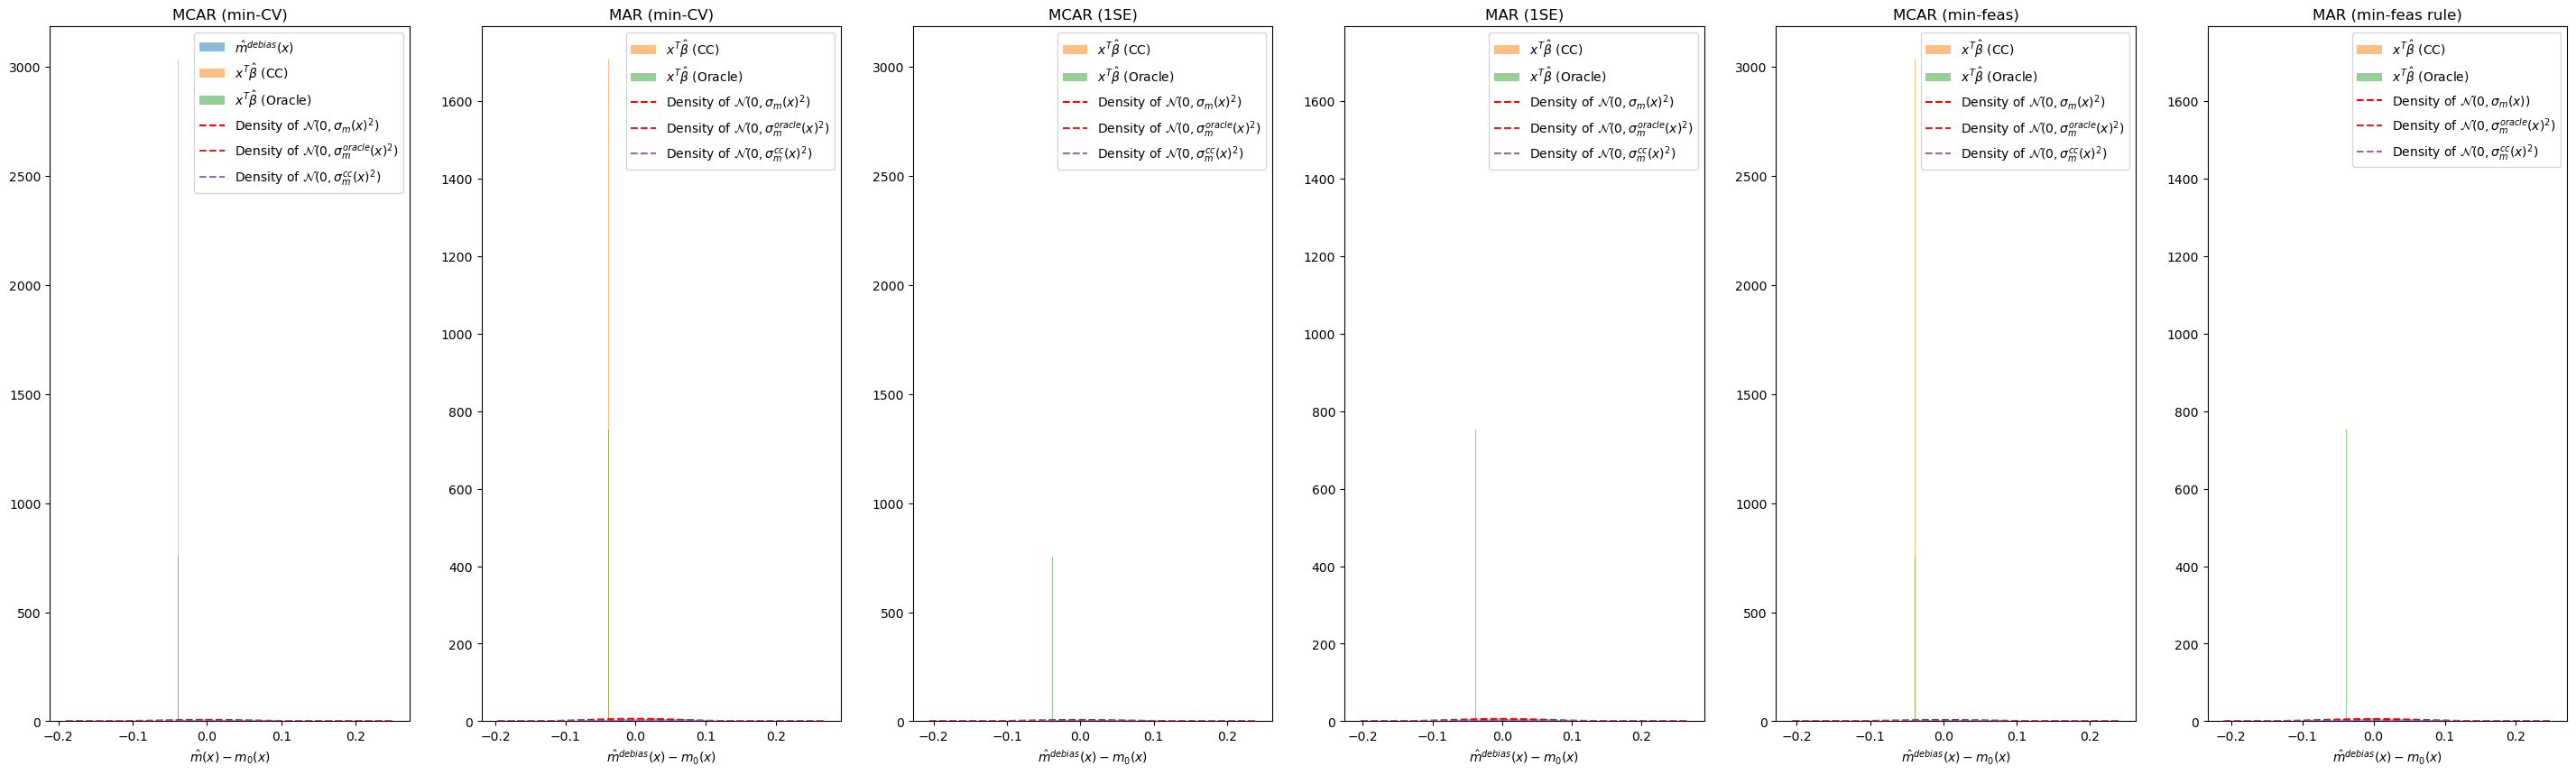

Scenario x3, beta0:



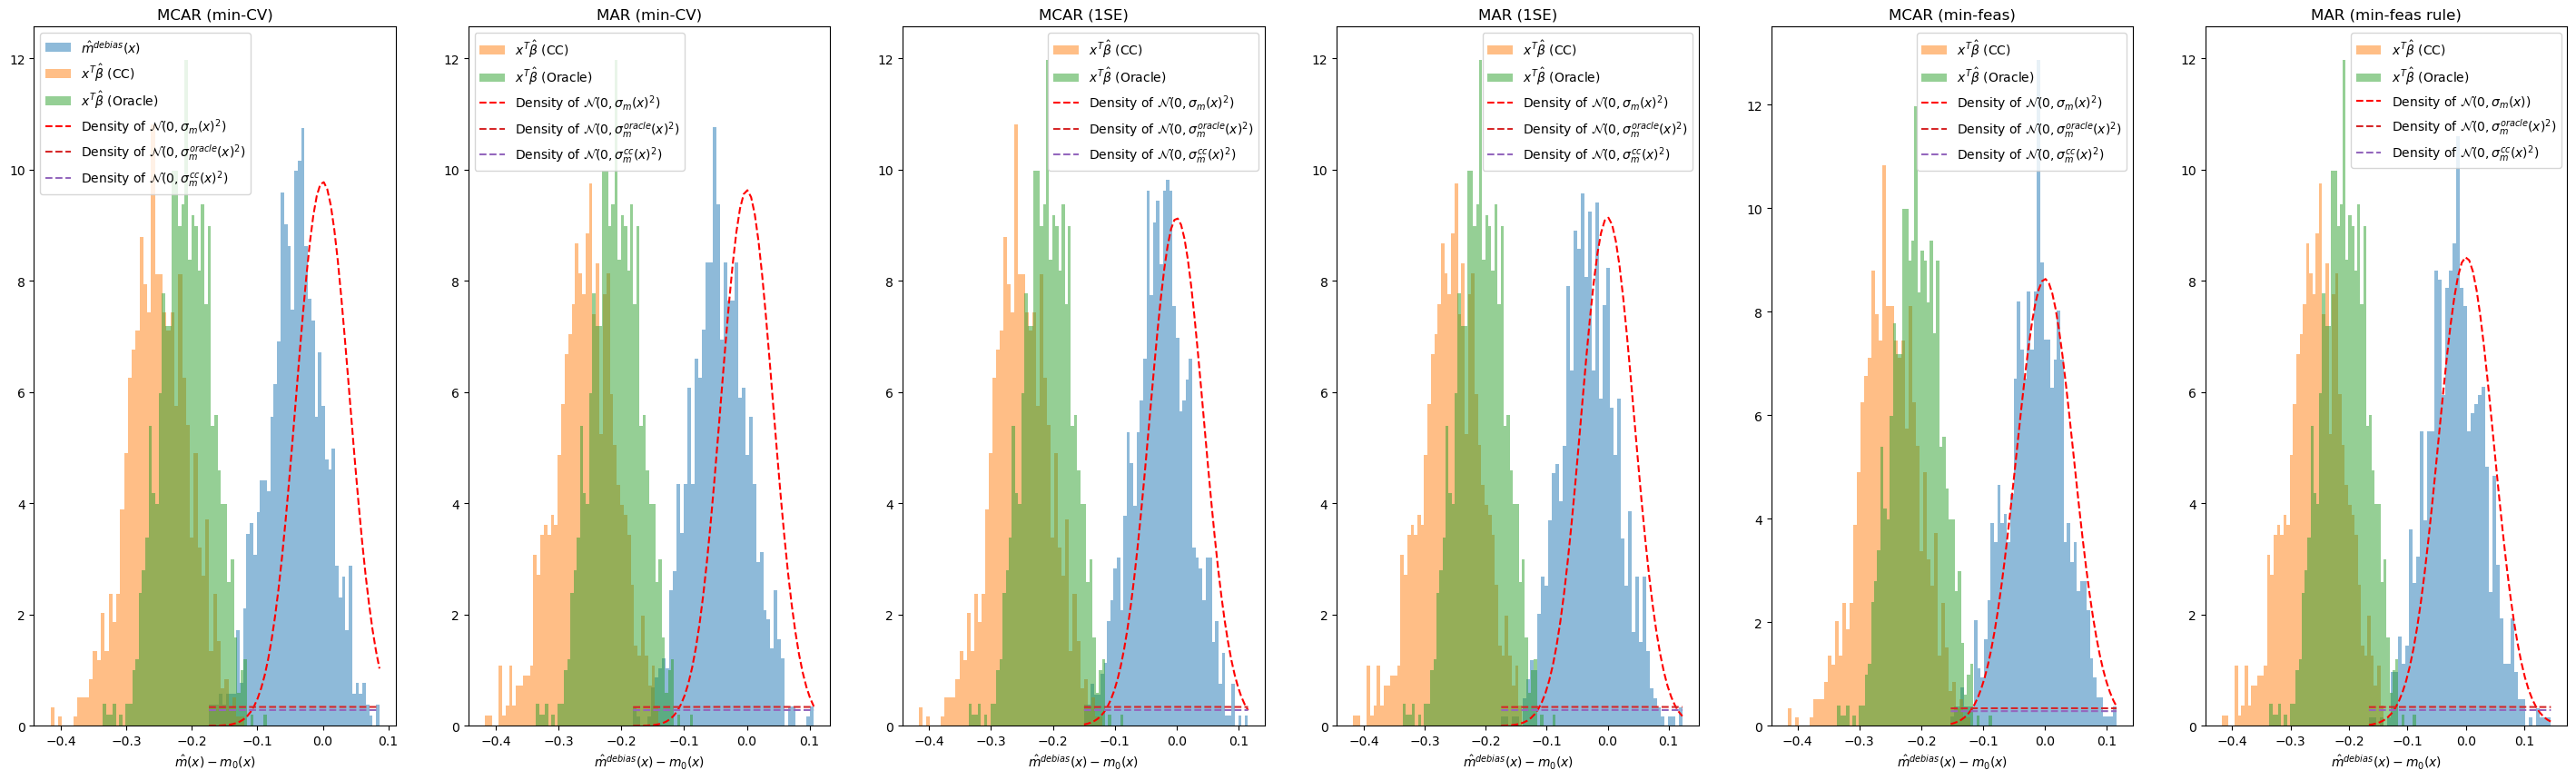

Scenario x3, beta1:



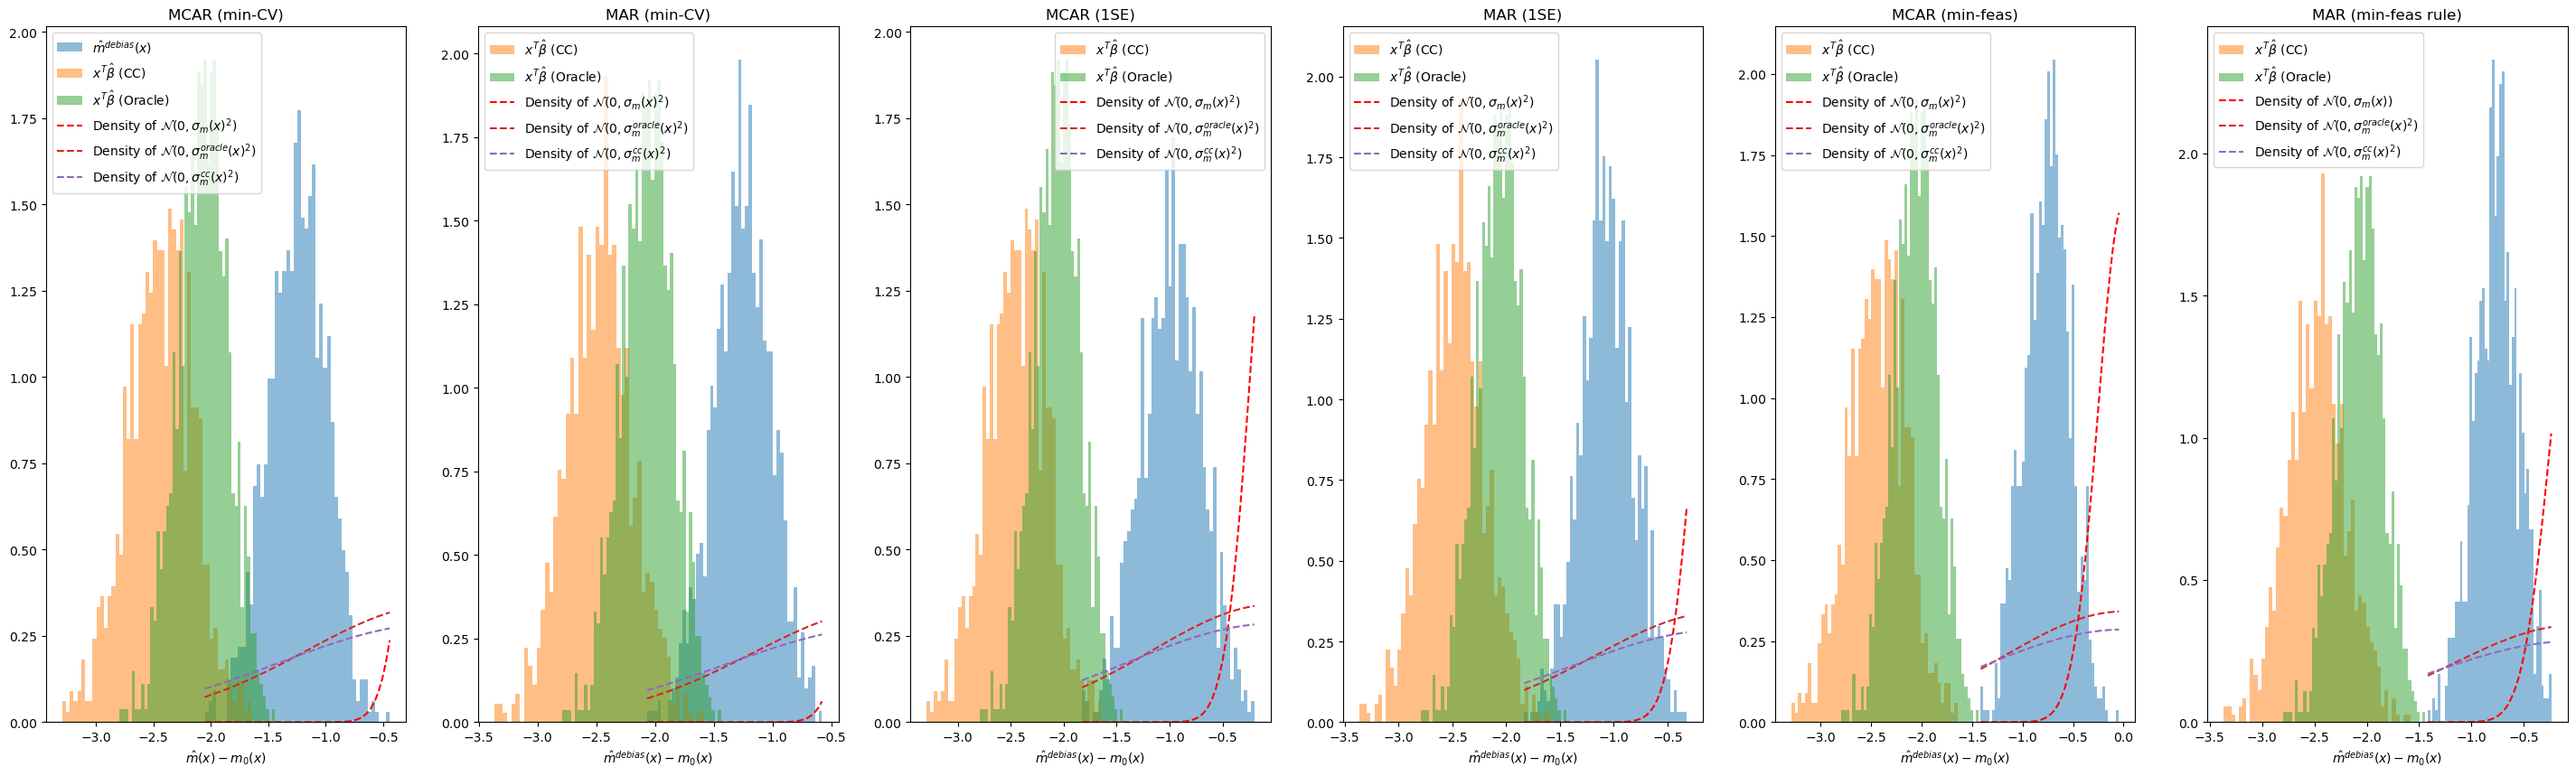

Scenario x3, beta2:



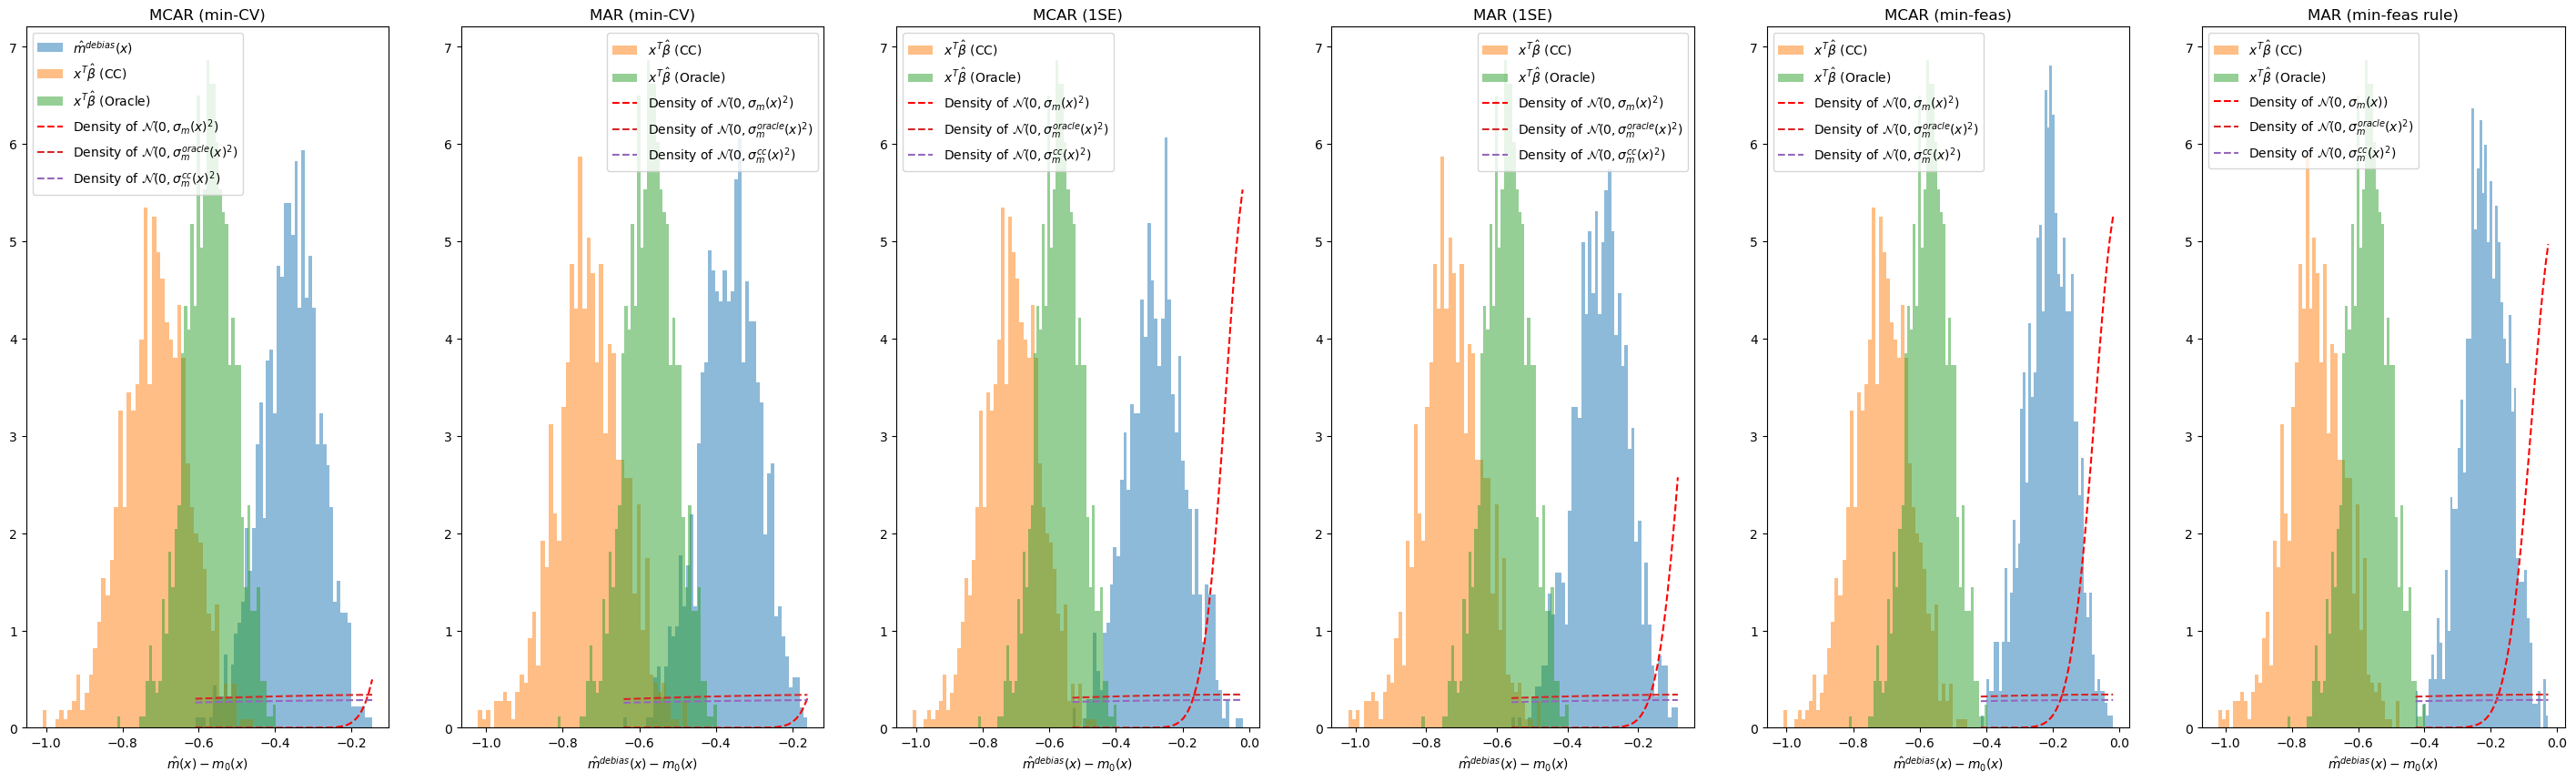

Scenario x4, beta0:



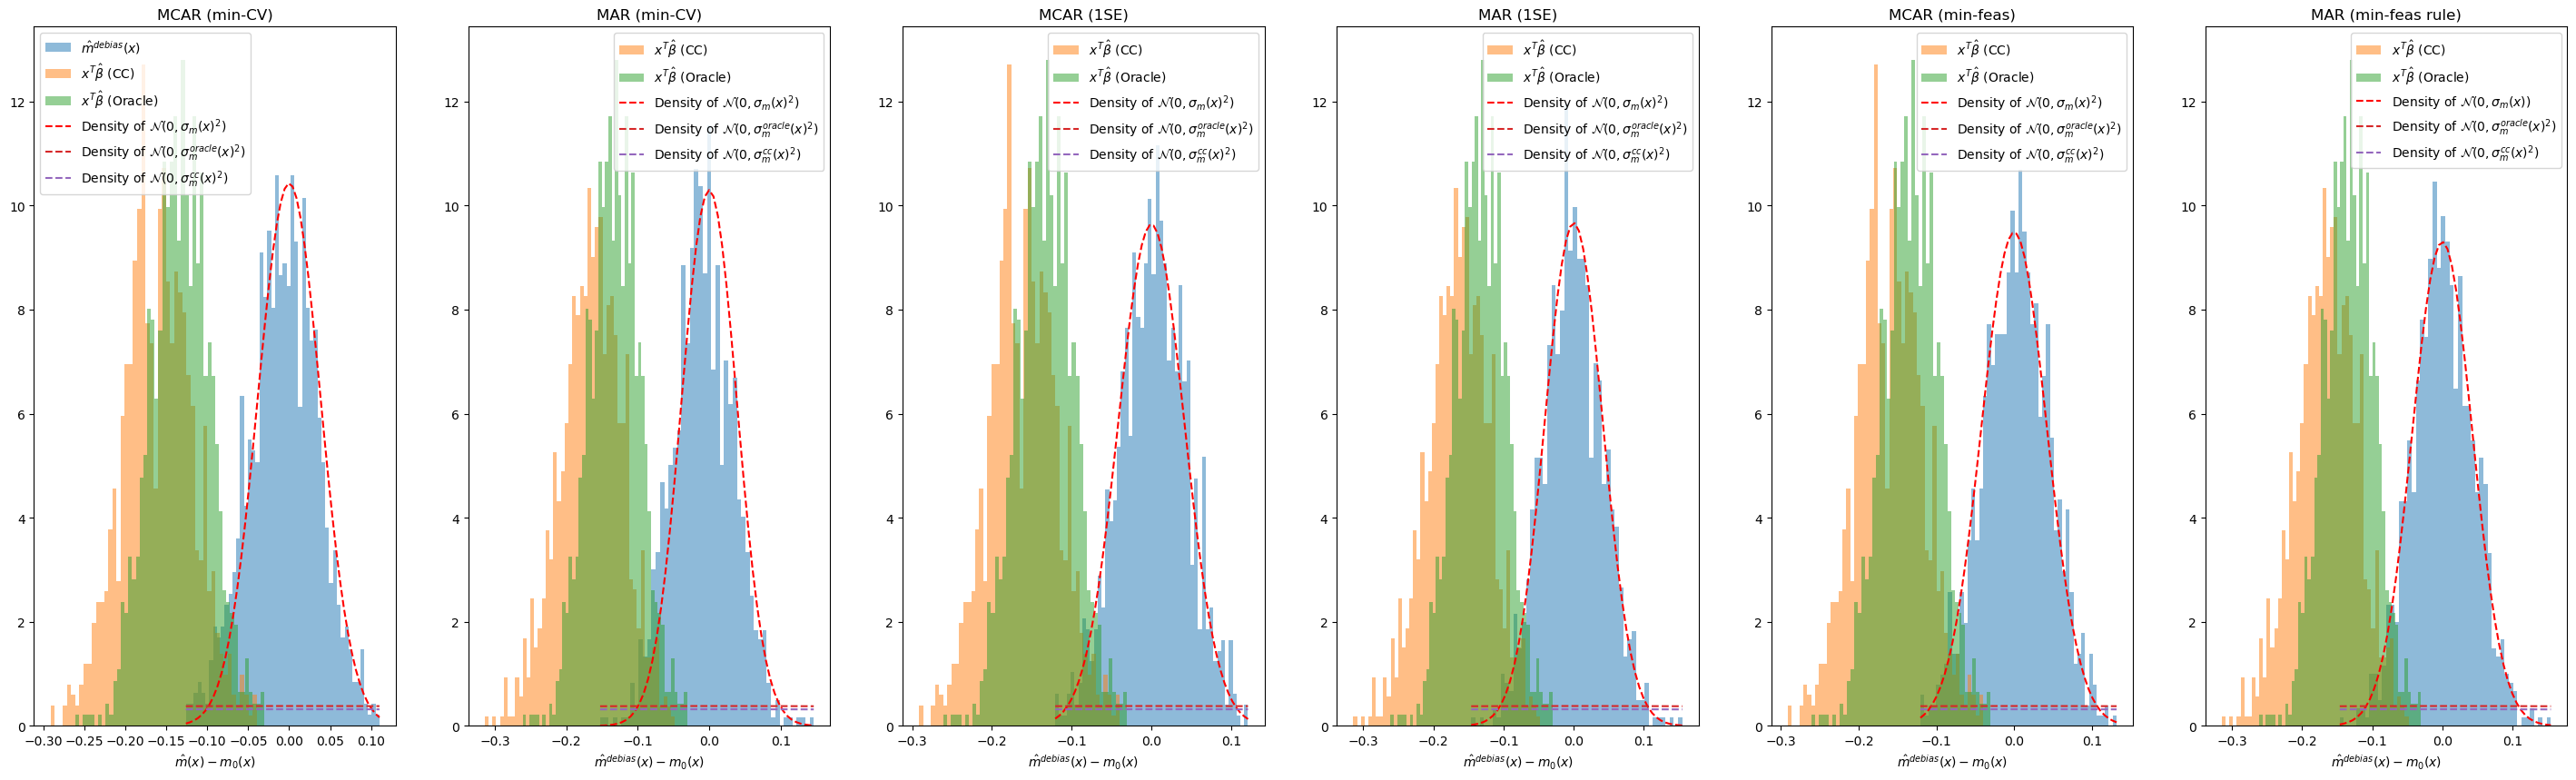

Scenario x4, beta1:



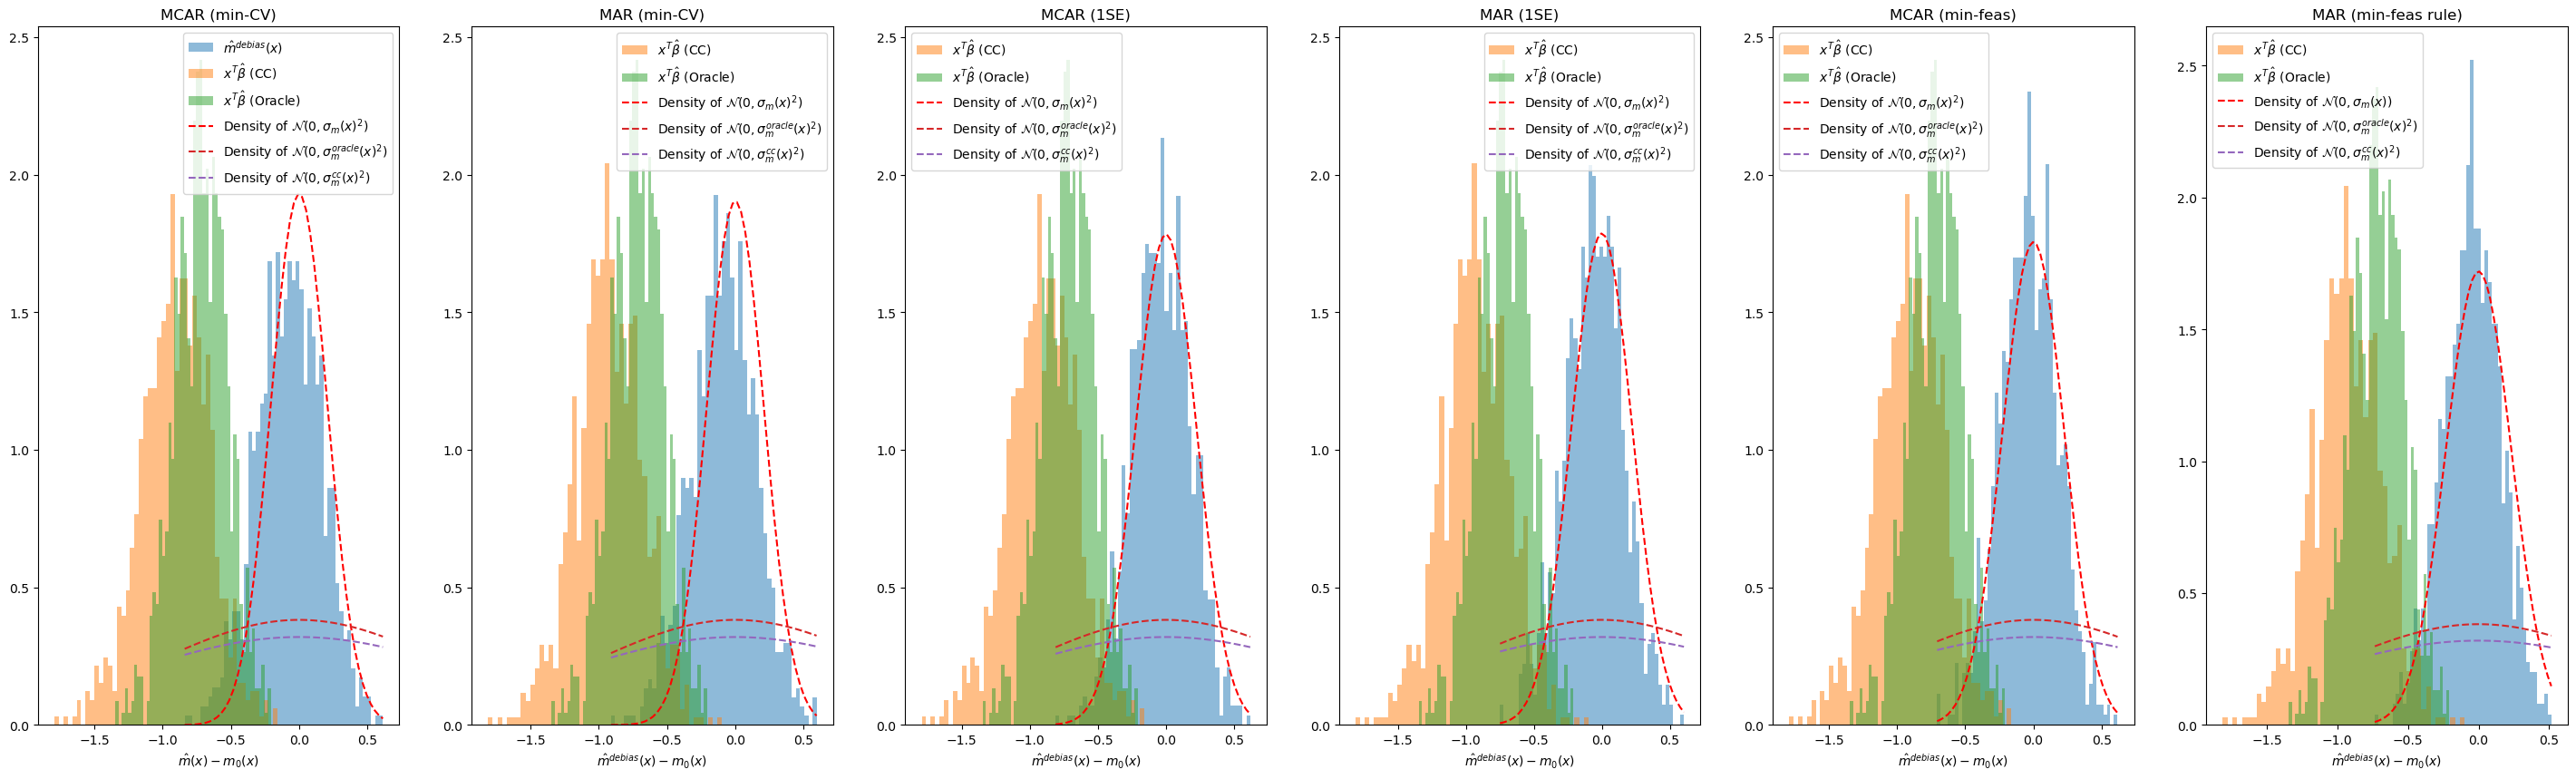

Scenario x4, beta2:



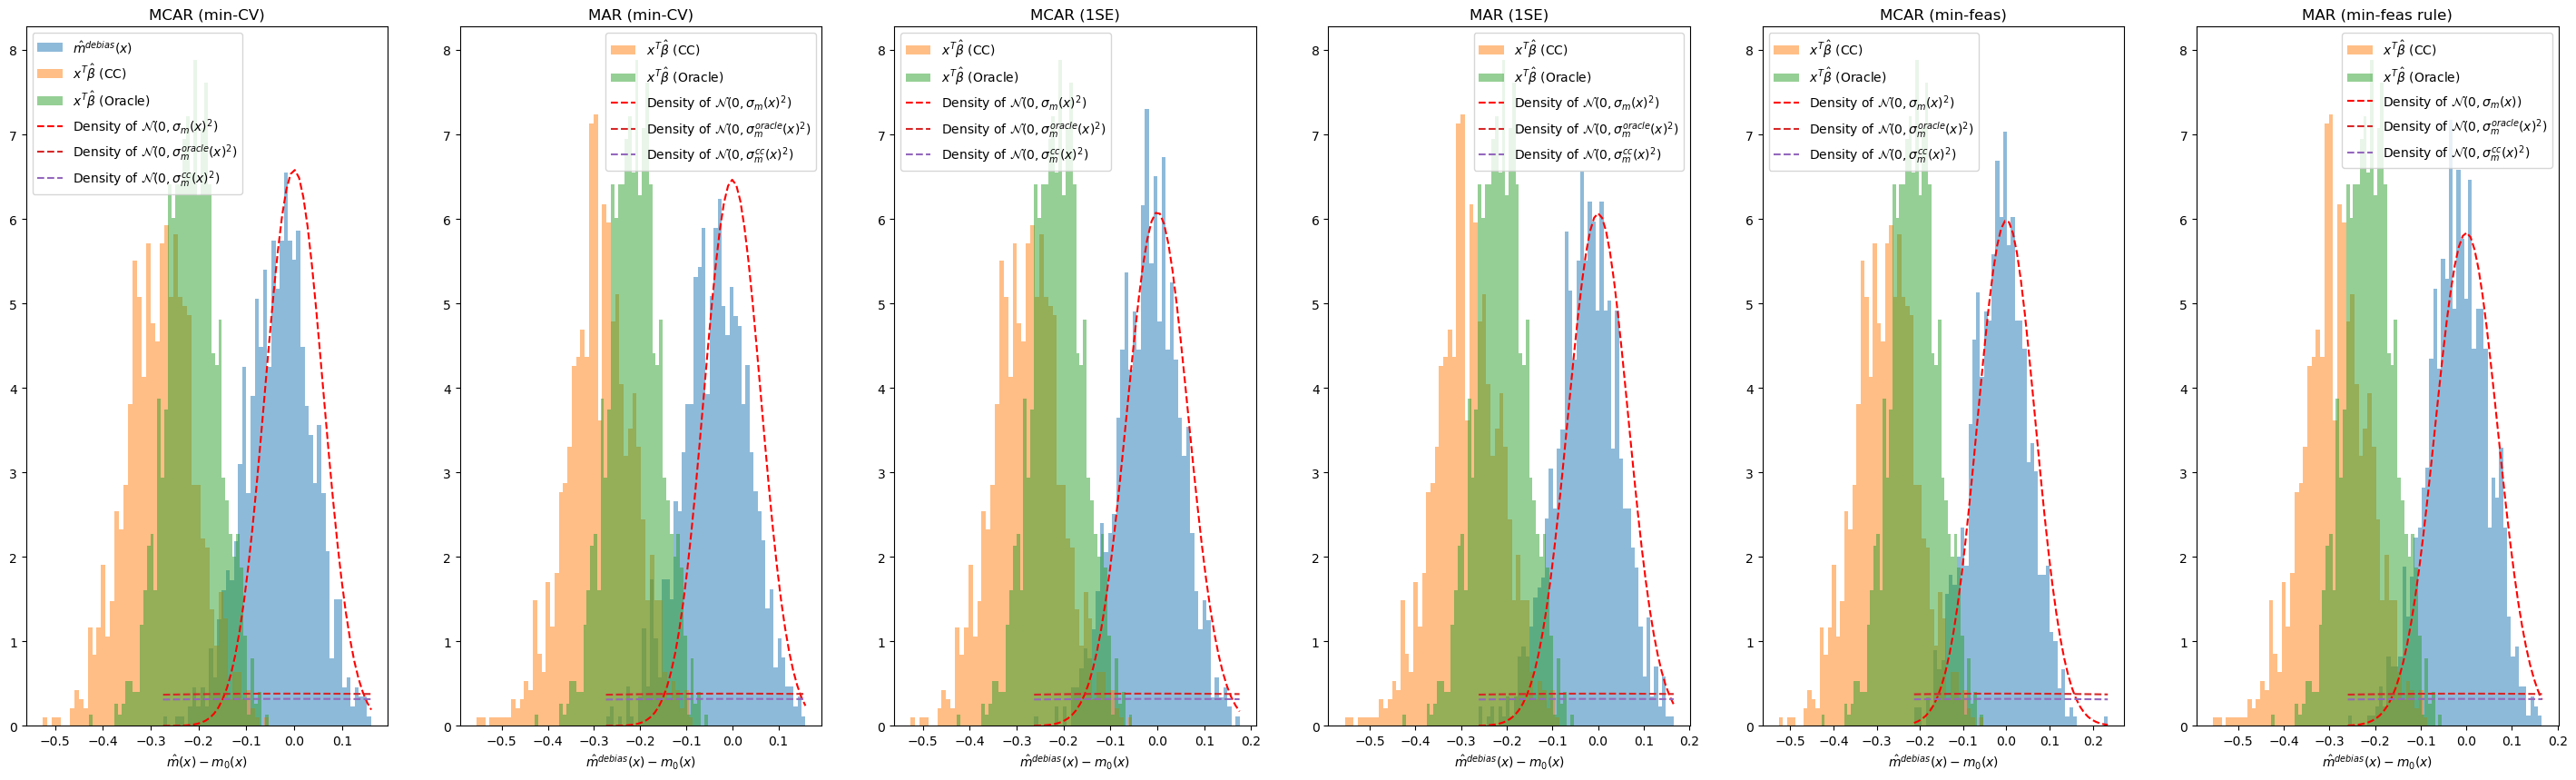

In [32]:
d = 1000
n= 900
B_repeat = 1000
for i in range(5):
    if i == 0:
        ## x0
        x = np.zeros((d,))
        x[0] = 1
    if i == 1:
        ## x1
        x = np.zeros((d,))
        x[0] = 1
        x[1] = 1/2
        x[2] = 1/4
        x[6] = 1/2
        x[7] = 1/8
    if i == 2:
        ## x2
        x = np.zeros((d,))
        x[99] = 1
    if i == 3:
        ## x3
        x = 1/np.linspace(1, d, d)
    if i == 4:
        ## x4
        x = 1/np.linspace(1, d, d)**2
    for k in range(3):
        if k == 0:
            s_beta = 5
            beta_0 = np.zeros((d,))
            beta_0[:s_beta] = np.sqrt(5)
        if k == 1:
            beta_0 = 1/np.sqrt(np.linspace(1, d, d))
            beta_0 = 5*beta_0/np.linalg.norm(beta_0)
        if k == 2:
            beta_0 = 1/np.linspace(1, d, d)
            beta_0 = 5*beta_0/np.linalg.norm(beta_0)

        # True regression function
        obs_prob1 = 0.7
        m_true = np.dot(x, beta_0)
        var_true_ora = (sig**2)*np.dot(np.dot(x, Sigma_inv), x)
        var_true_mcar = (sig**2)*np.dot(np.dot(x, Sigma_inv)/obs_prob1, x)
        
        print('Scenario x'+str(i)+', beta'+str(k)+':\n')
        
        las_pil_res1 = pd.read_csv('./Results/lasso_pilot_Cirsym_d'+str(d)+'_n'+str(n)+'_1000_x'+str(i)+'_beta'+str(k)+'_gauss.csv')
        debl_res1 = pd.read_csv('./Results/debl_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        refit_res1 = pd.read_csv('./Results/refit_Cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        lproj_res1 = pd.read_csv('./Results/lproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        deb_est_1se = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_1se.csv')
        deb_est_mincv = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_mincv.csv')
        deb_est_minfeas = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_minfeas.csv')
        if (i == 0) or (i == 2):
            rproj_res1 = pd.read_csv('./Results/rproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        
        
        plt.figure(figsize=(36,10))
        plt.subplot(161)
        plt.hist((deb_est_mincv['m_deb1'] - m_true), bins=50, density=True, alpha=0.5, label=r'$\hat{m}^{debias}(x)$')
        plt.hist(las_pil_res1['m_obs1'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = deb_est_mincv['m_deb1'] - m_true
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_mincv['asym_se1'] * deb_est_mincv['sigma_hat1'])), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (min-CV)')
        
        plt.subplot(162)
        plt.hist((deb_est_mincv['m_deb2'] - m_true), bins=50, density=True, alpha=0.5)
        plt.hist(las_pil_res1['m_obs2'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = deb_est_mincv['m_deb2'] - m_true
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_mincv['asym_se2'] * deb_est_mincv['sigma_hat2'])), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (min-CV)')
        
        plt.subplot(163)
        plt.hist((deb_est_1se['m_deb1'] - m_true), bins=50, density=True, alpha=0.5)
        plt.hist(las_pil_res1['m_obs1'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = deb_est_1se['m_deb1'] - m_true
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_1se['asym_se1'] * deb_est_1se['sigma_hat1'])), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (1SE)')
        
        plt.subplot(164)
        plt.hist((deb_est_1se['m_deb2'] - m_true), bins=50, density=True, alpha=0.5)
        plt.hist(las_pil_res1['m_obs2'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = deb_est_1se['m_deb2'] - m_true
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2'])), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (1SE)')
        
        plt.subplot(165)
        plt.hist((deb_est_minfeas['m_deb1'] - m_true), bins=50, density=True, alpha=0.5)
        plt.hist(las_pil_res1['m_obs1'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = deb_est_minfeas['m_deb1'] - m_true
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1'])), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (min-feas)')
        
        plt.subplot(166)
        plt.hist((deb_est_minfeas['m_deb2'] - m_true), bins=50, density=True, alpha=0.5)
        plt.hist(las_pil_res1['m_obs2'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist(las_pil_res1['m_full'] - m_true, bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_minfeas['m_deb2'] - m_true)
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.mean(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])), color='red', linestyle='dashed', 
                 label='Density of $\mathcal{N}(0,\sigma_m(x))$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_ora)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{oracle}(x)^2)$')
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, np.sqrt(var_true_mcar)), 
                 linestyle='dashed', label='Density of $\mathcal{N}(0,\sigma_m^{cc}(x)^2)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (min-feas rule)')
        plt.show()

Scenario x0, beta0:



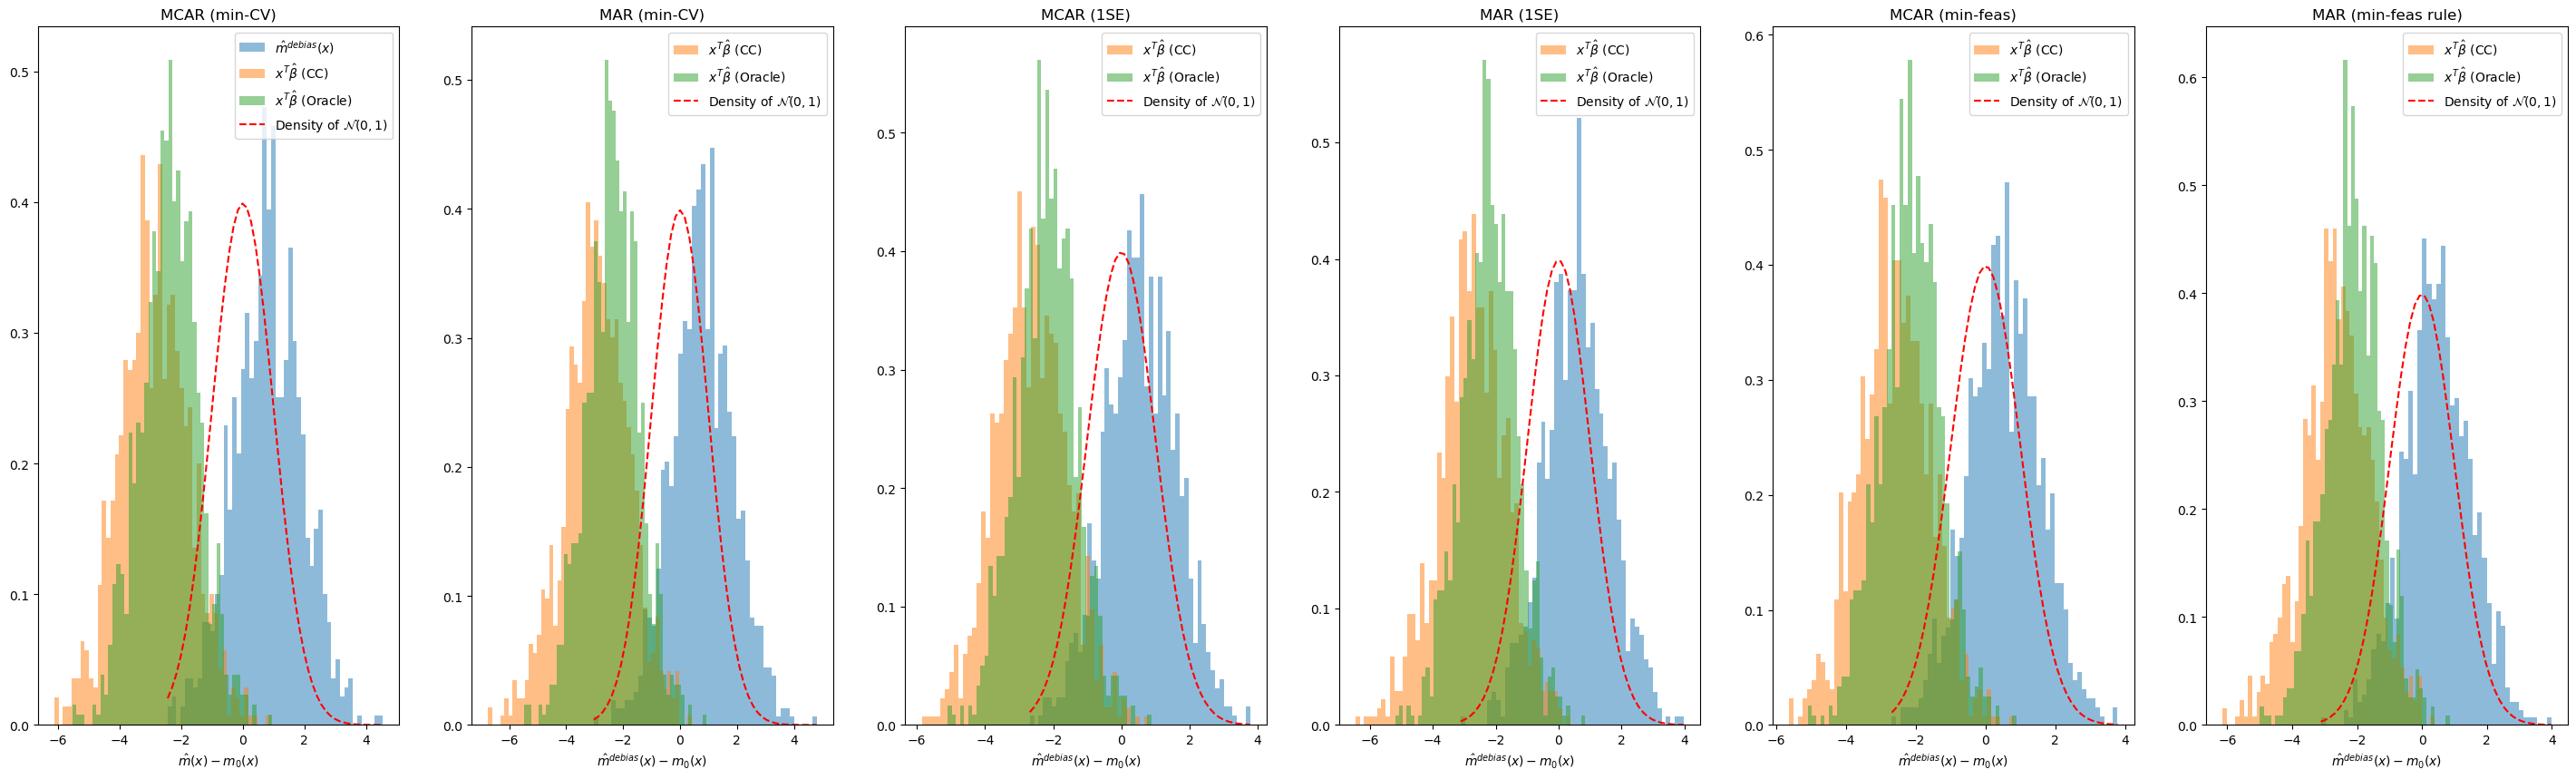

Scenario x0, beta1:



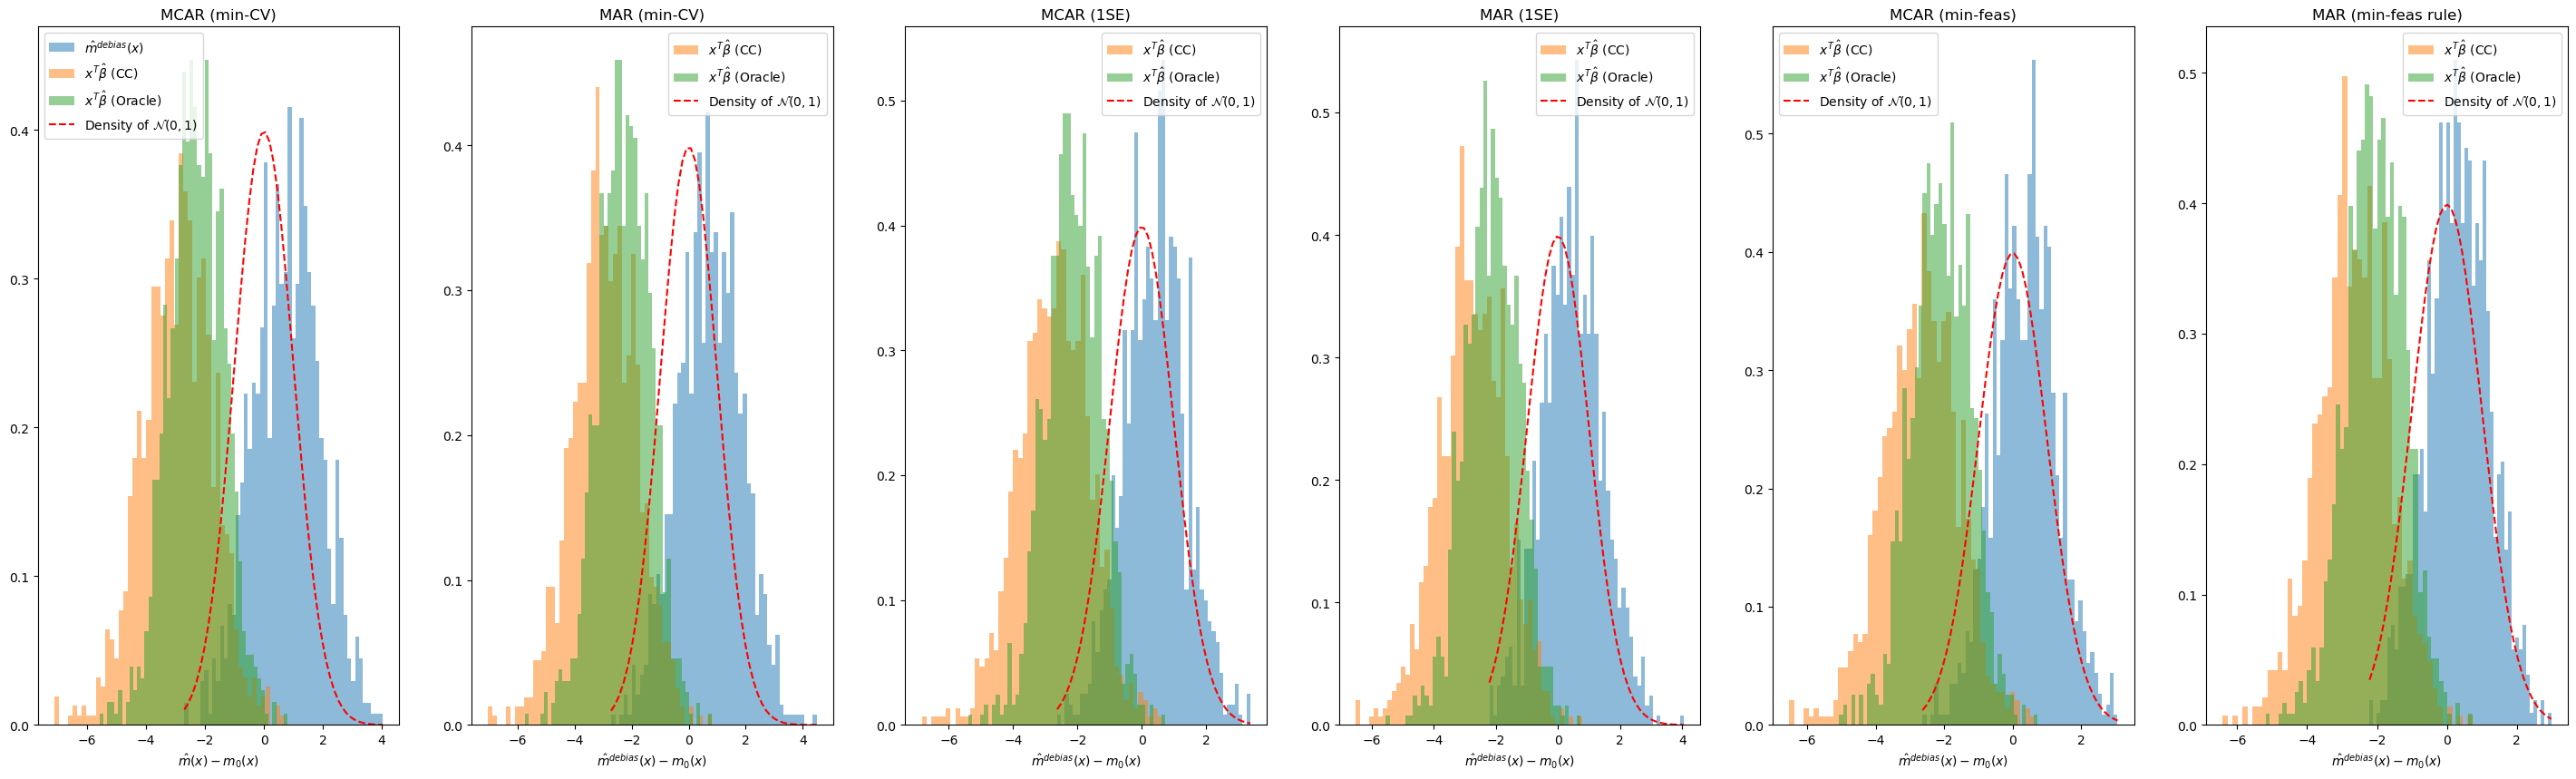

Scenario x0, beta2:



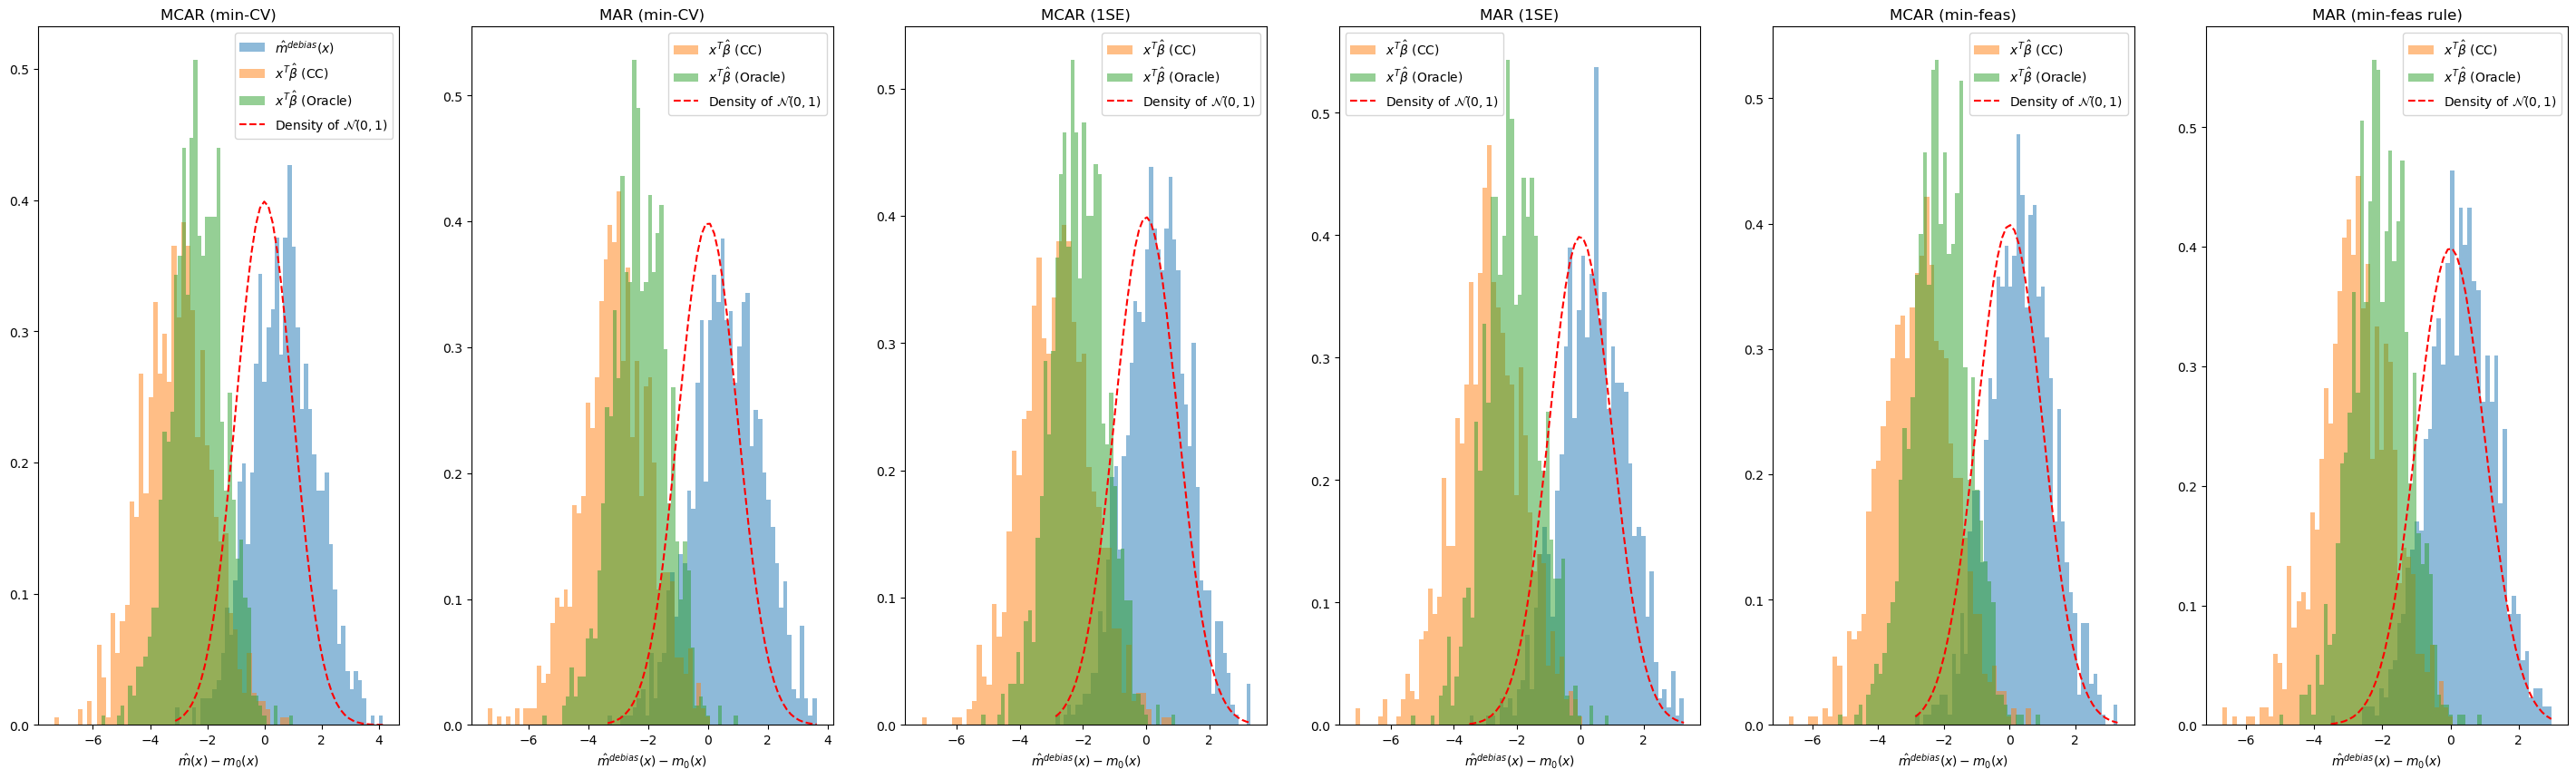

Scenario x1, beta0:



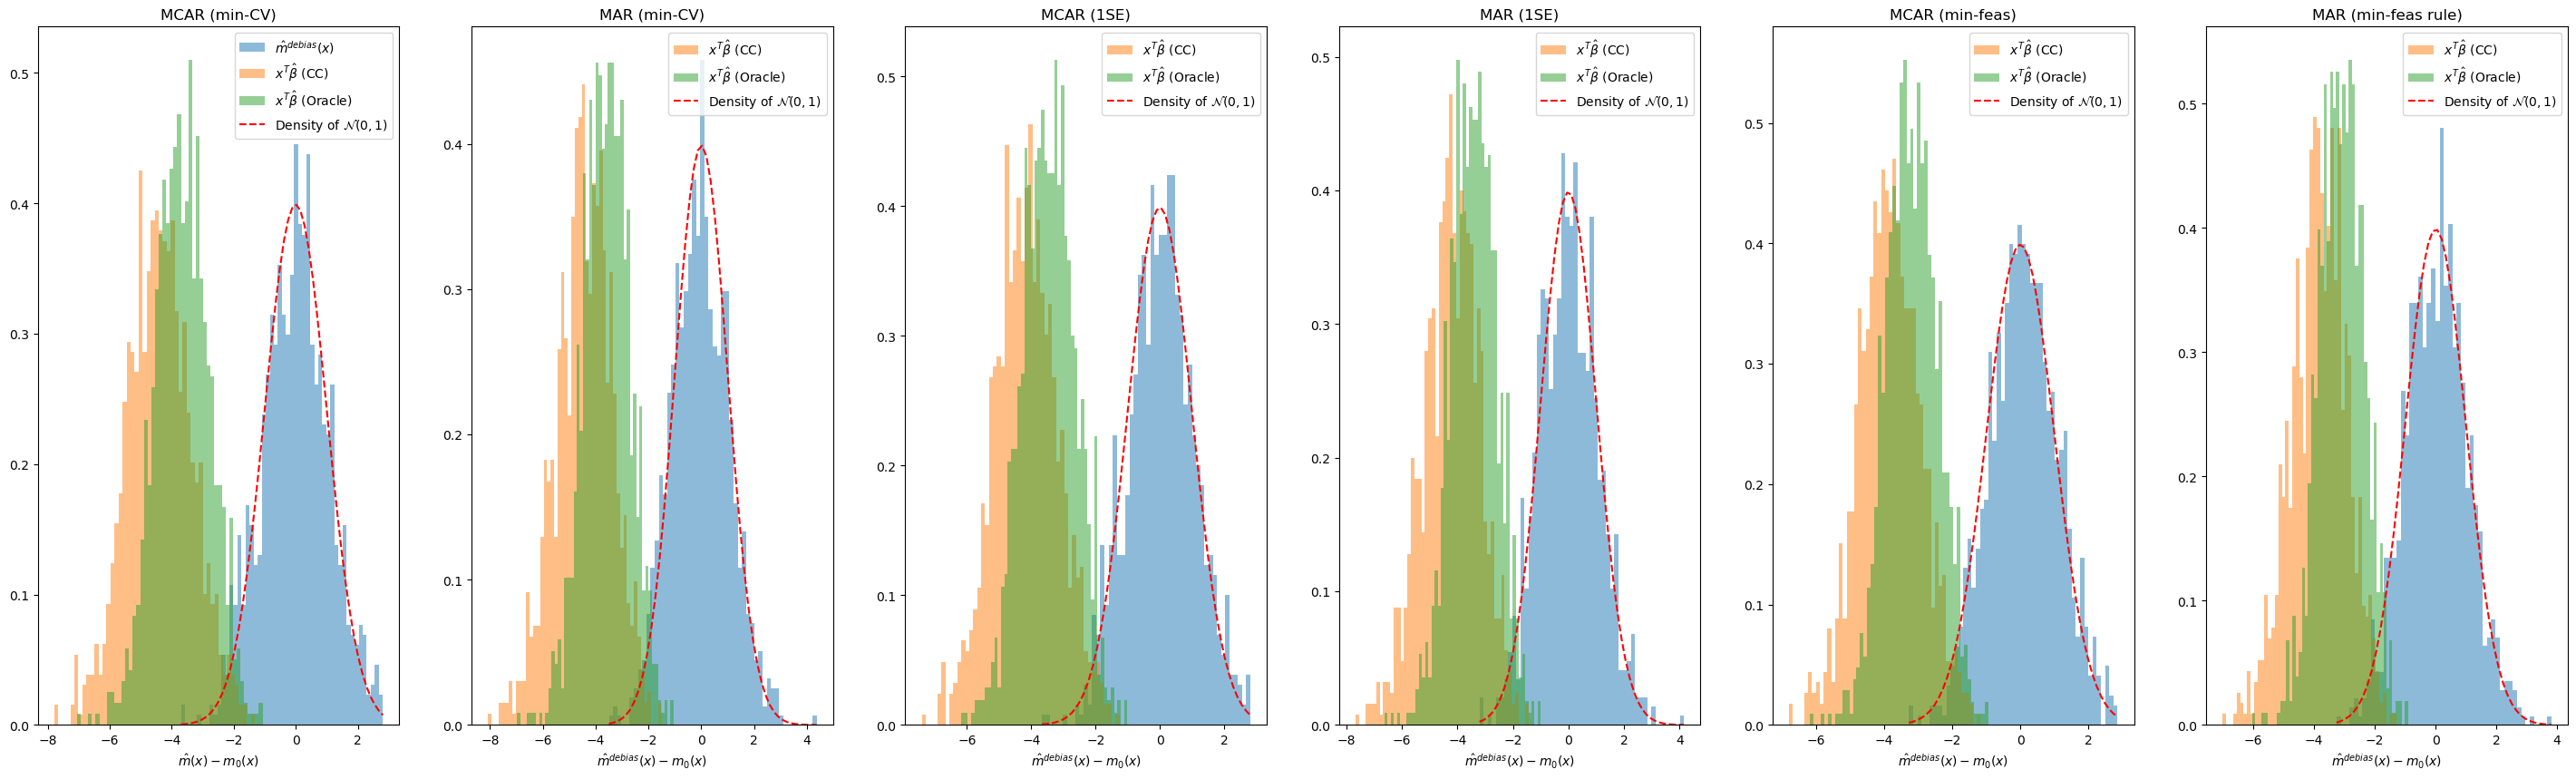

Scenario x1, beta1:



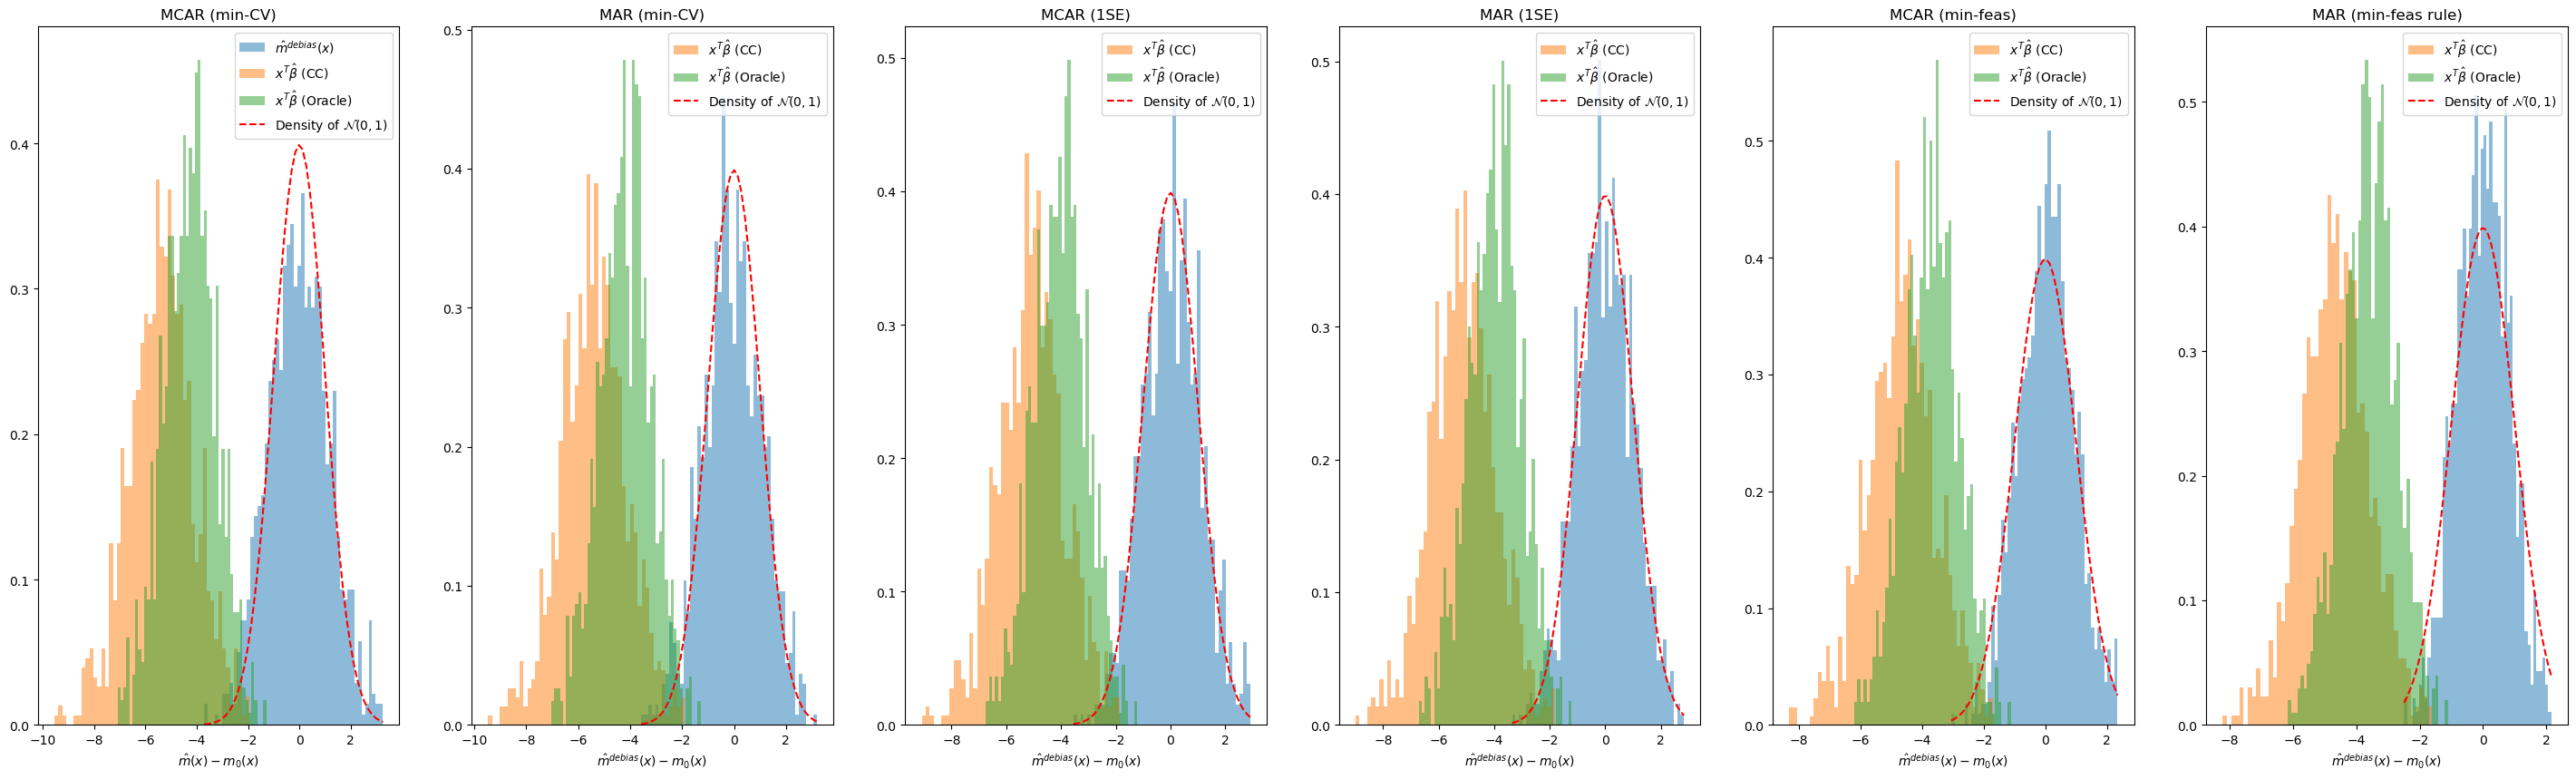

Scenario x1, beta2:



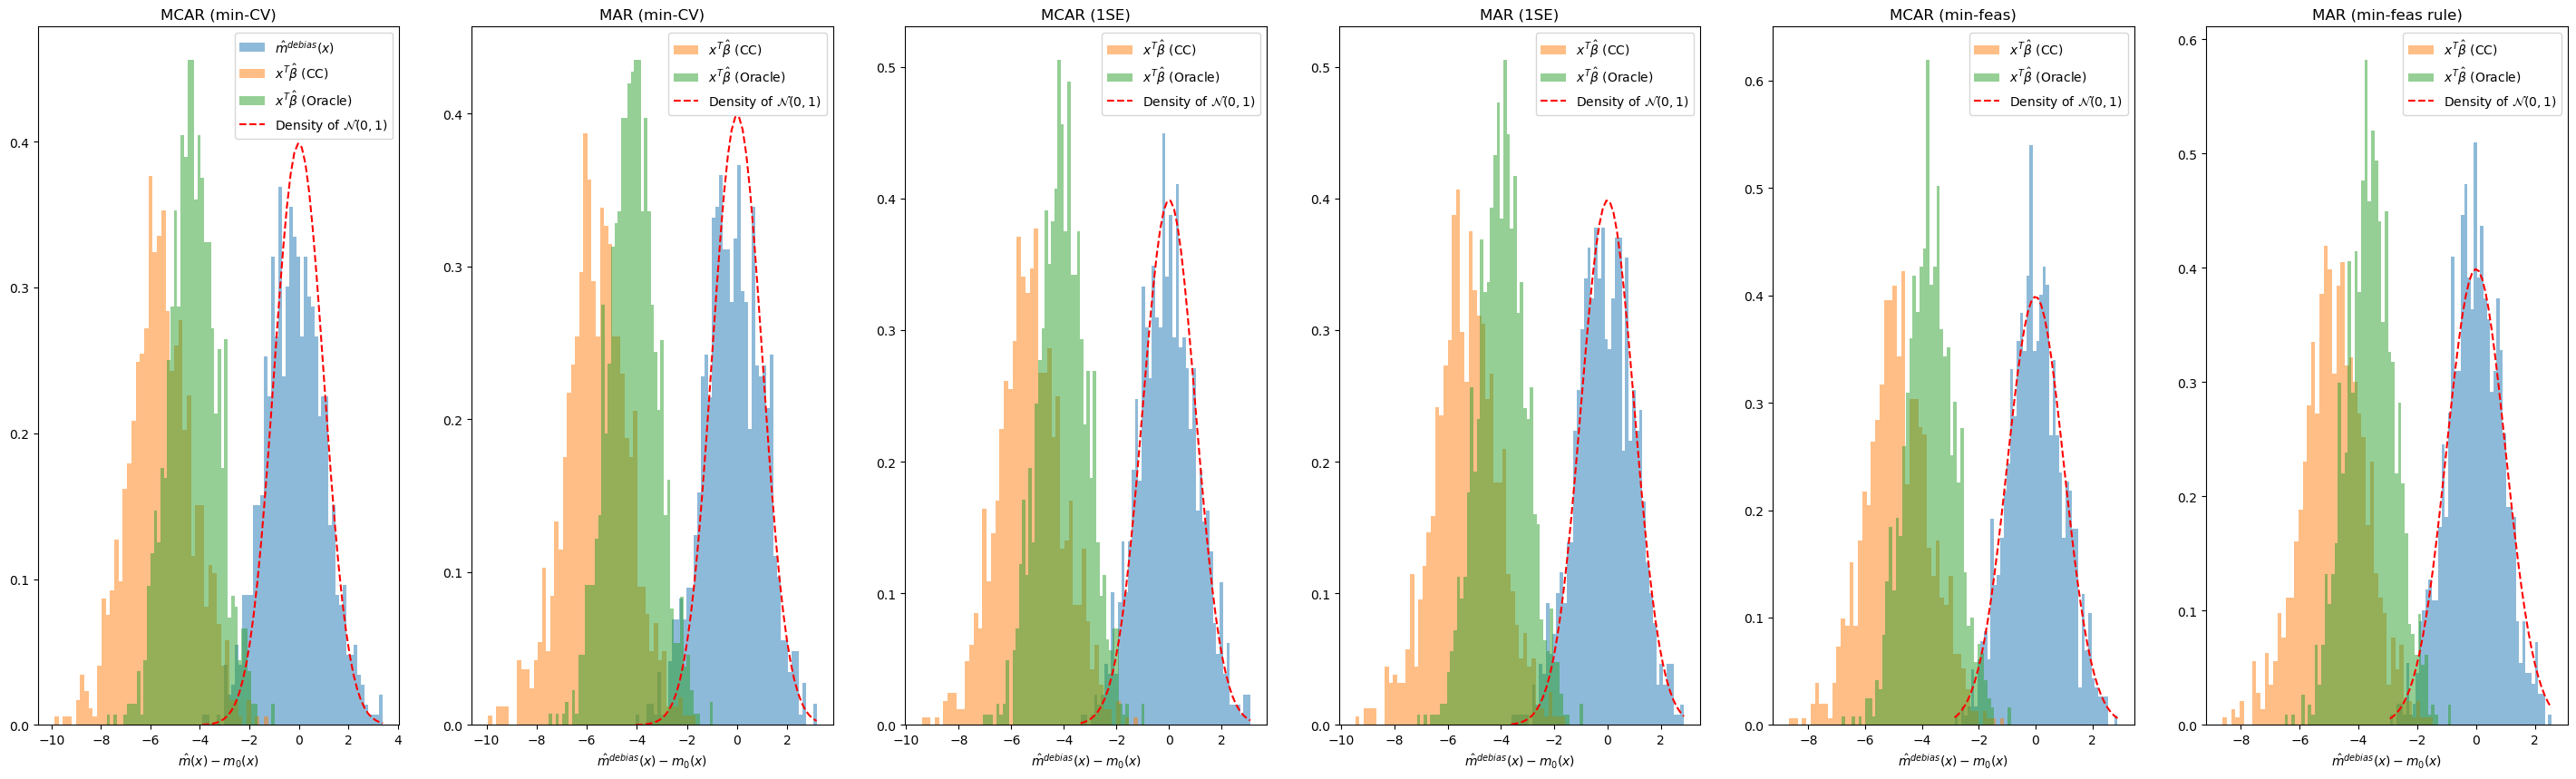

Scenario x2, beta0:



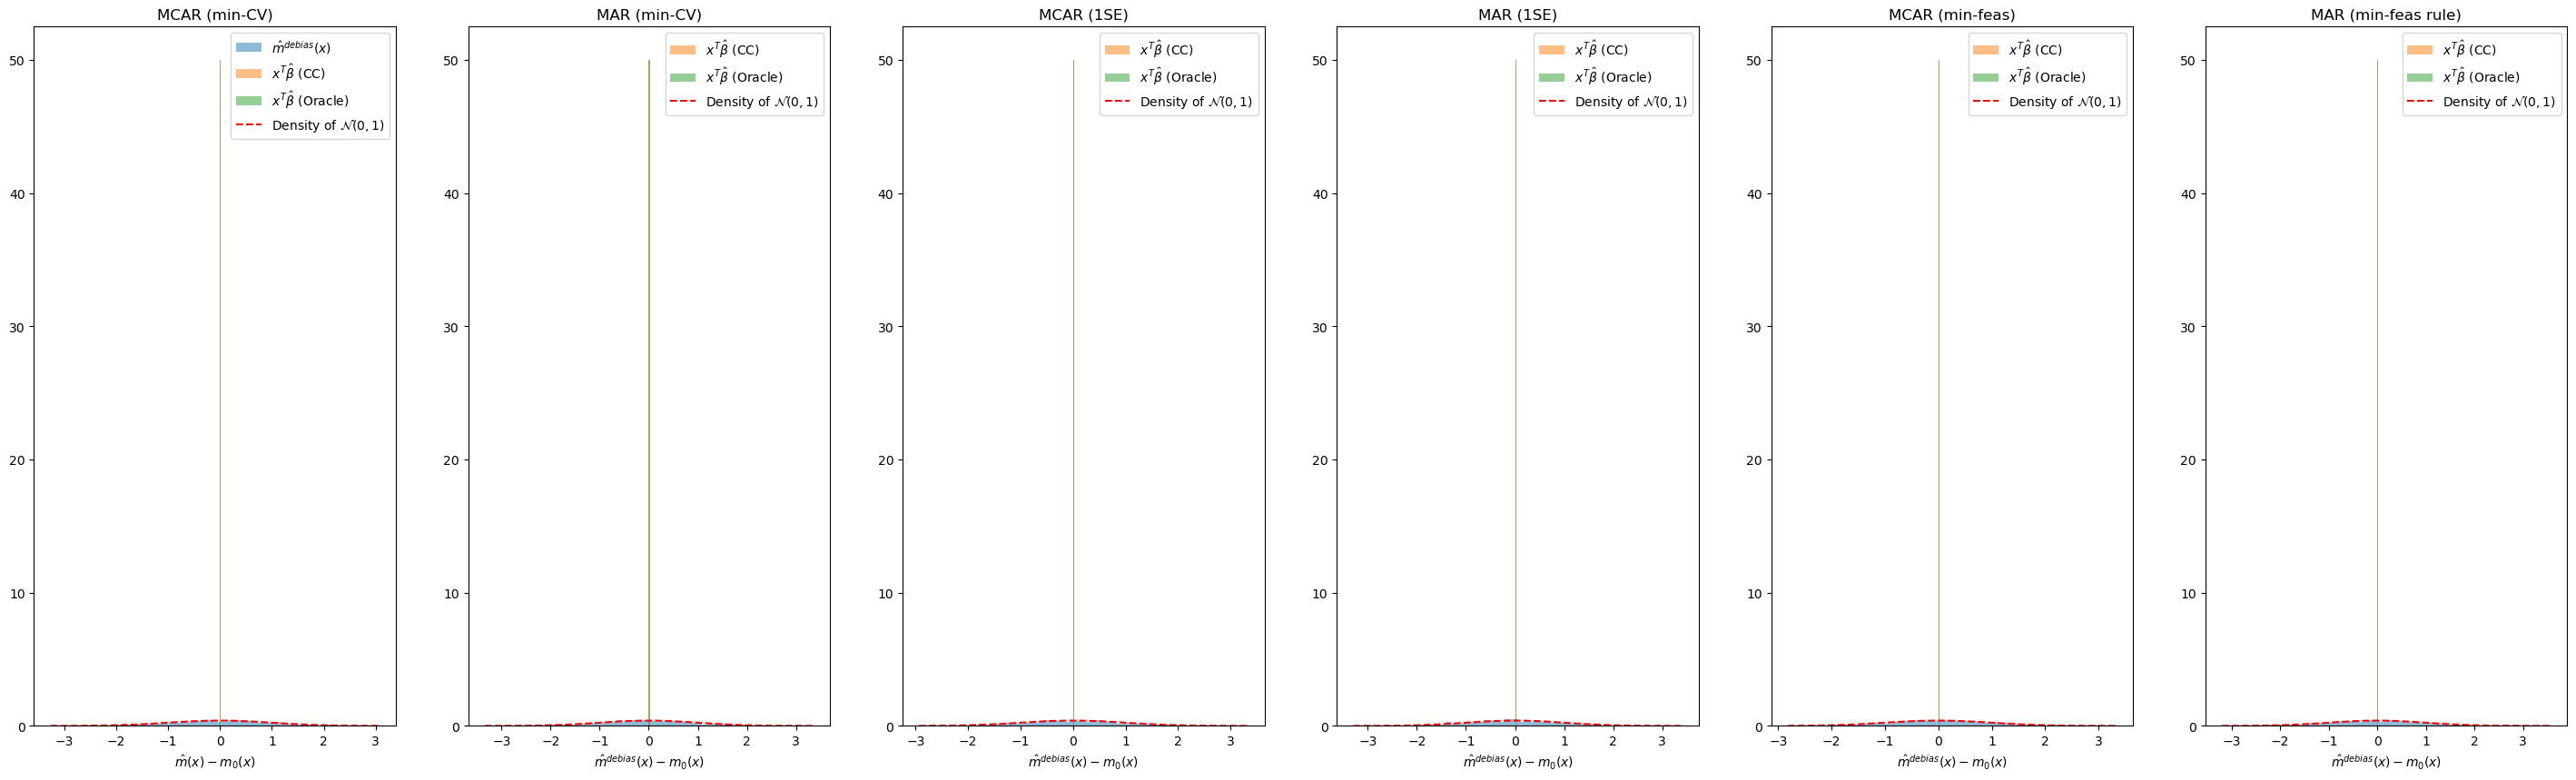

Scenario x2, beta1:



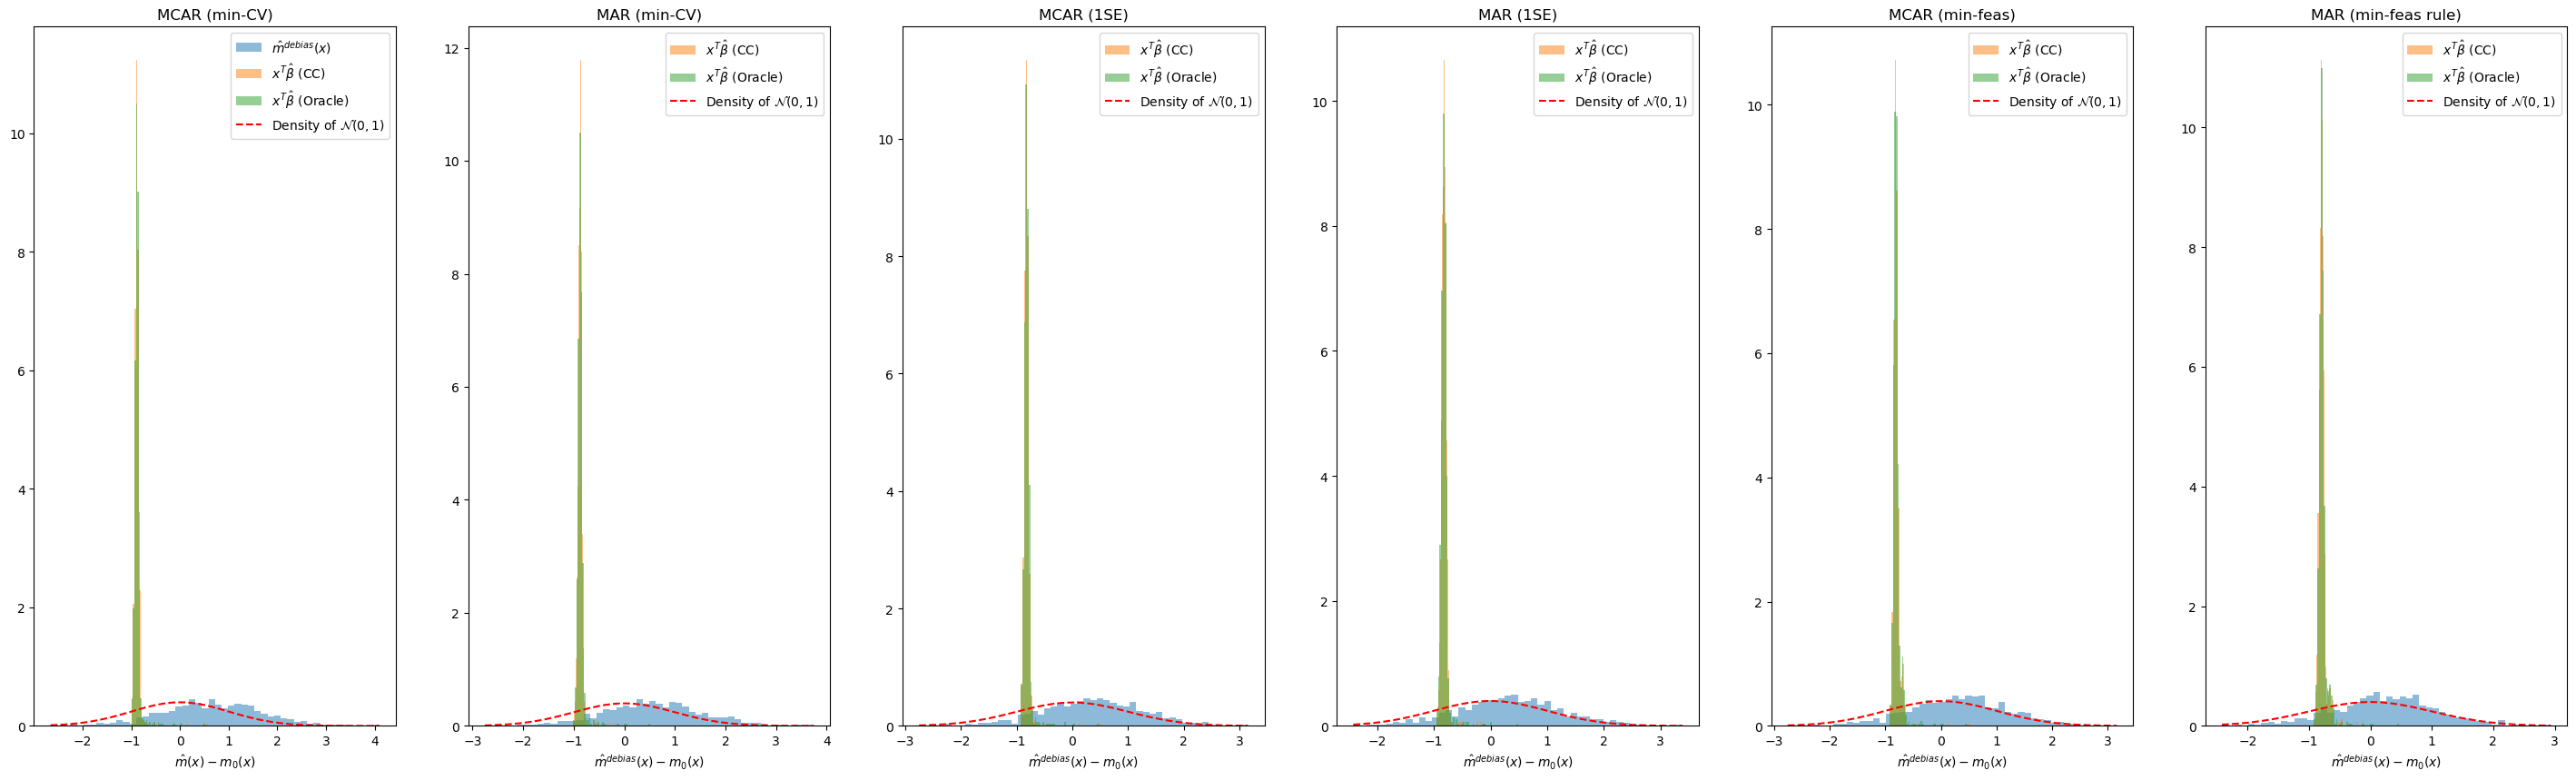

Scenario x2, beta2:



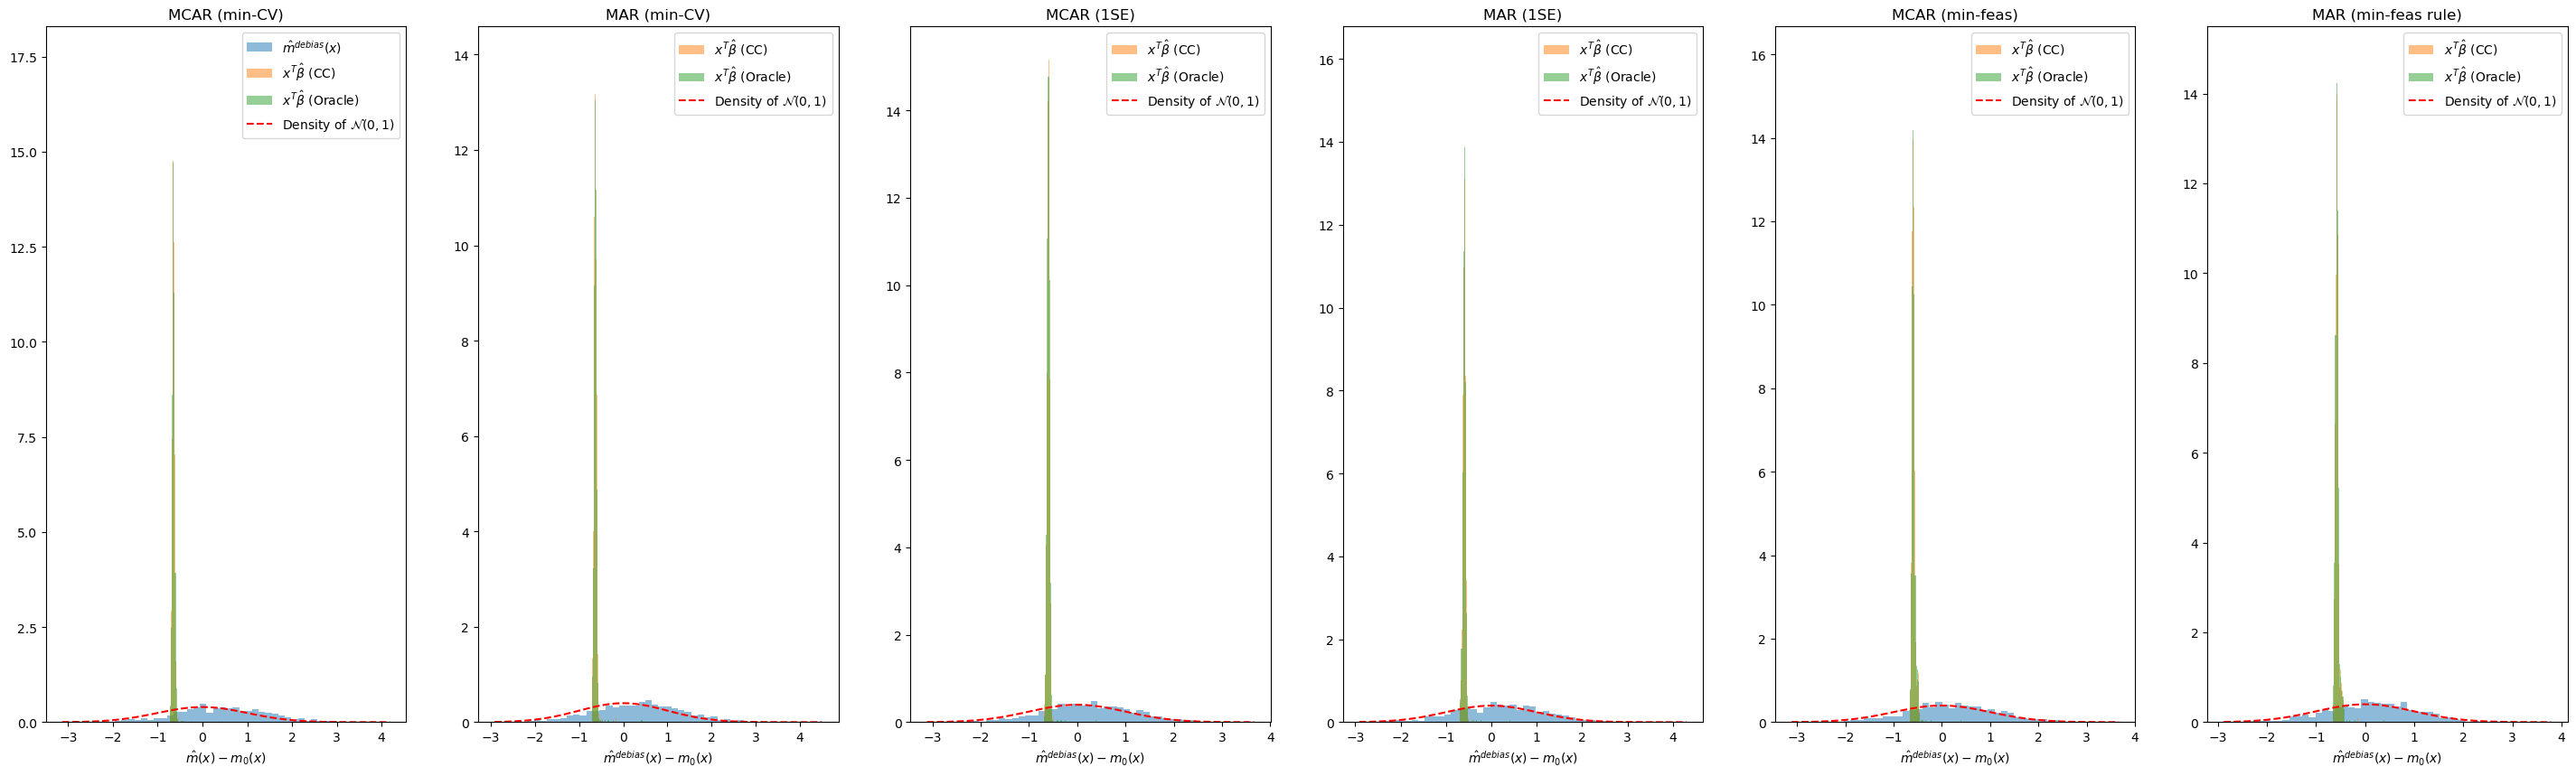

Scenario x3, beta0:



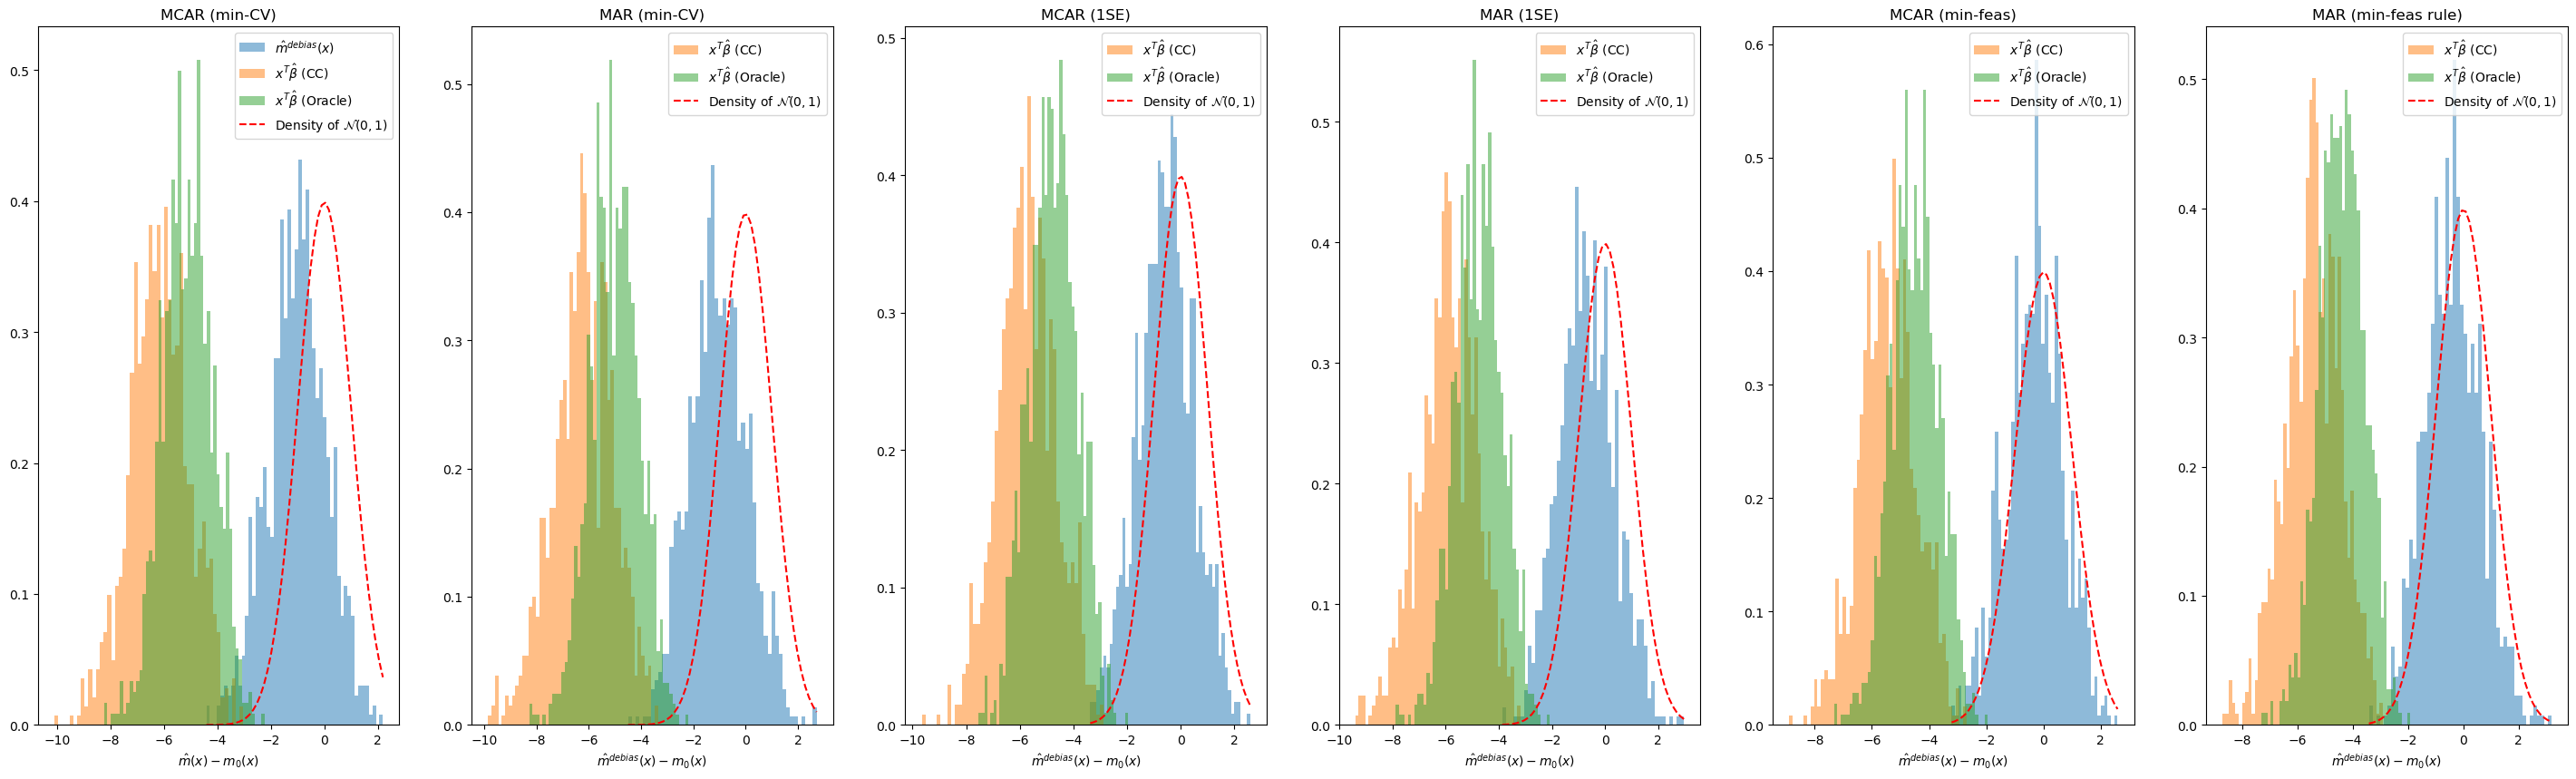

Scenario x3, beta1:



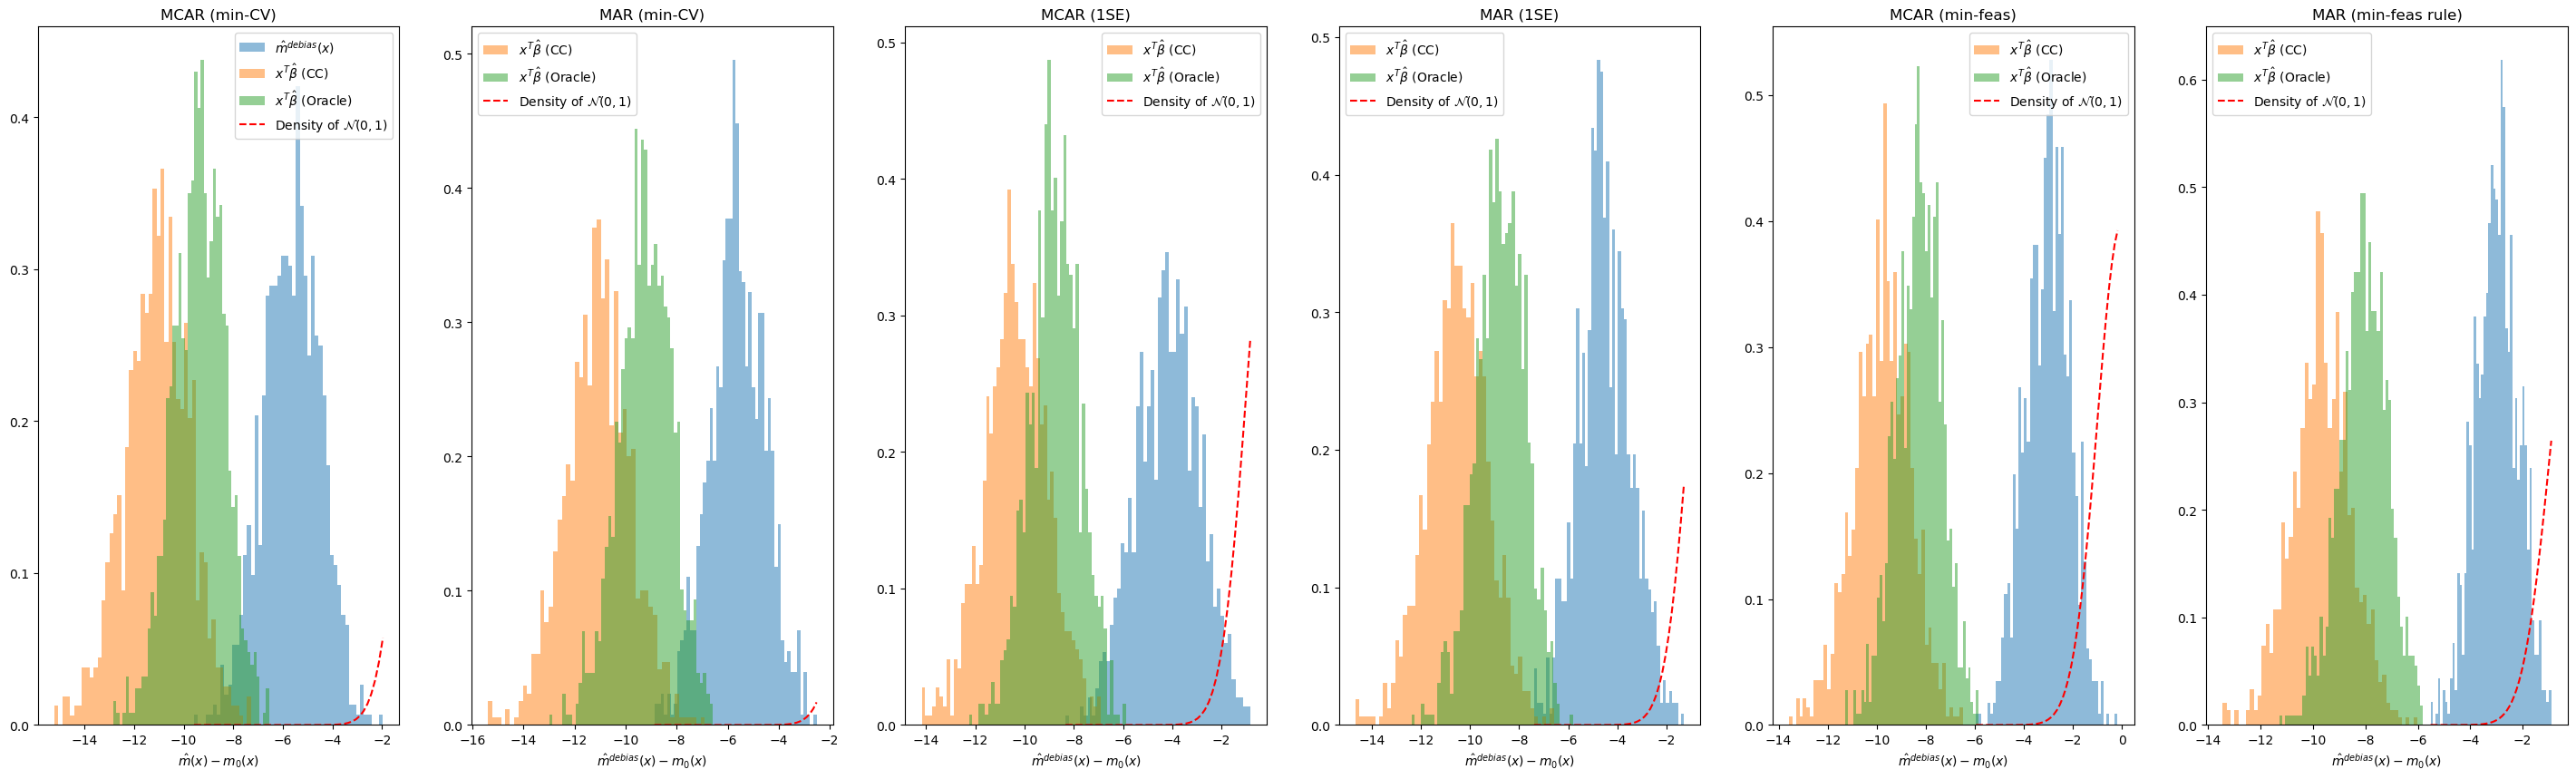

Scenario x3, beta2:



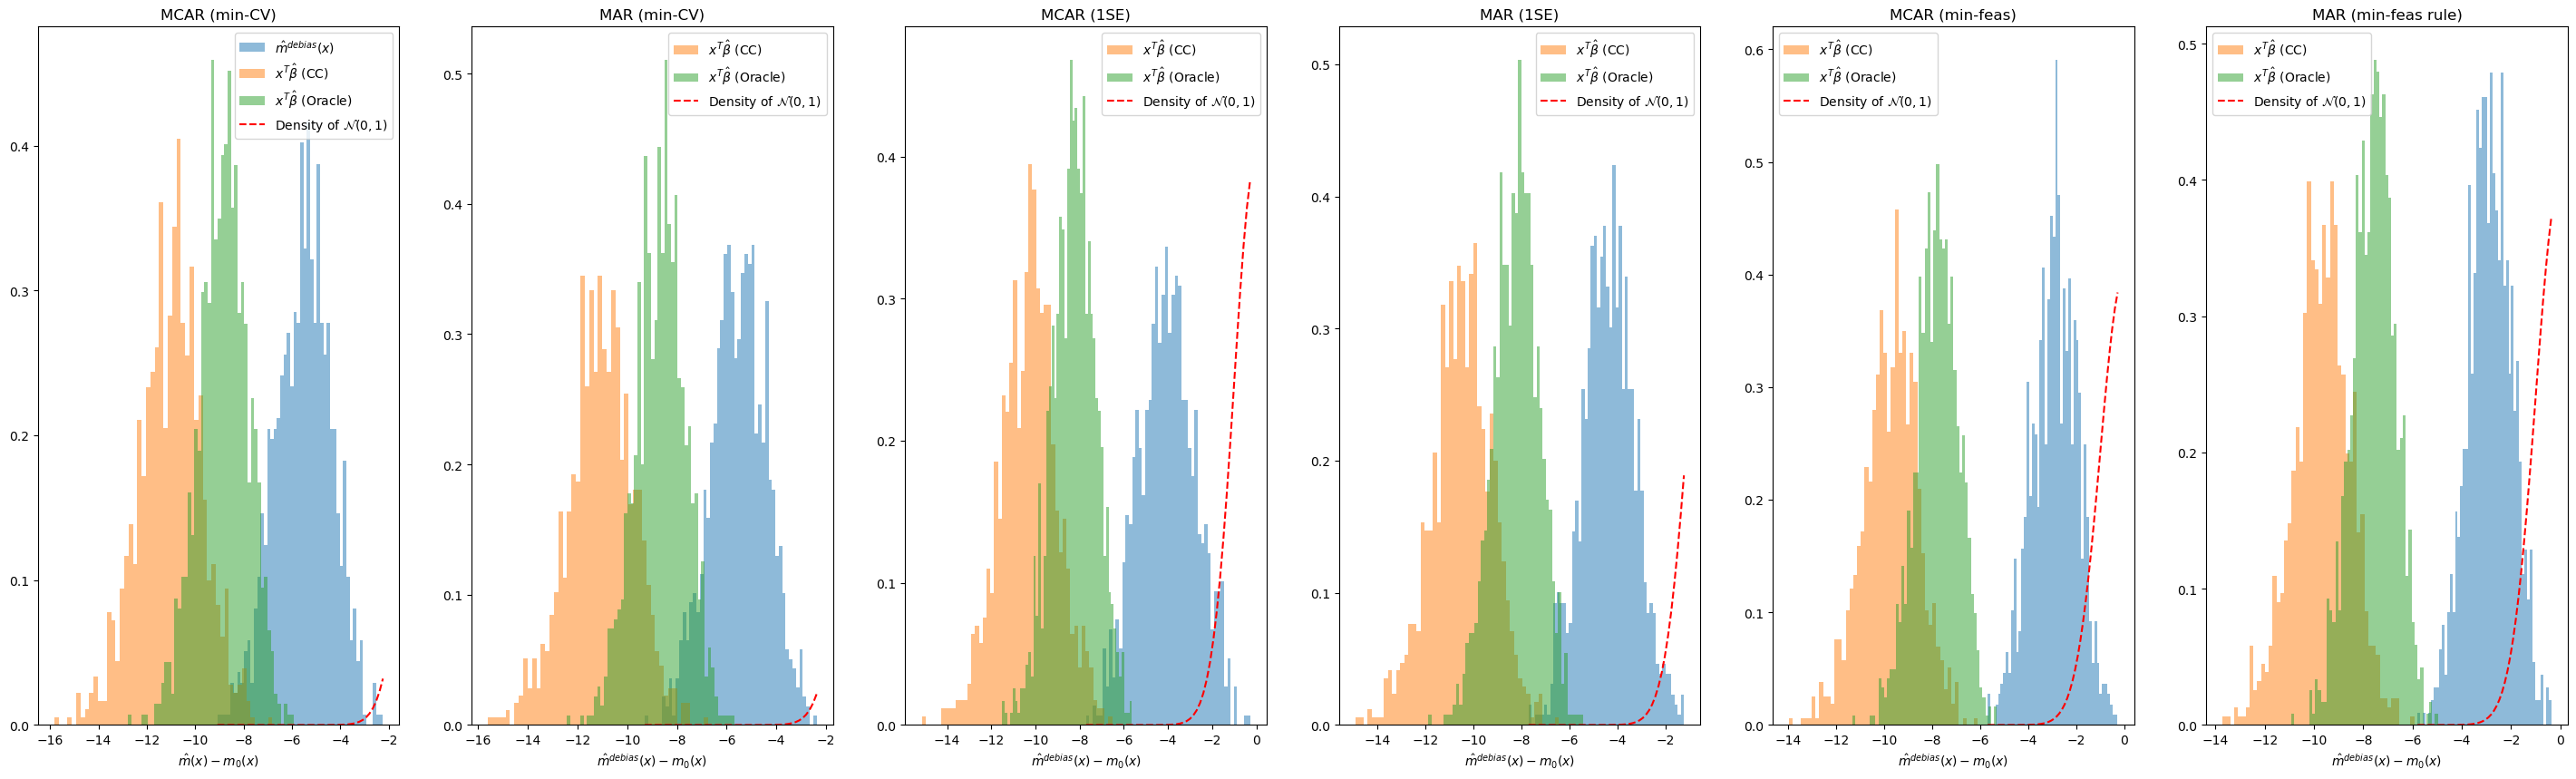

Scenario x4, beta0:



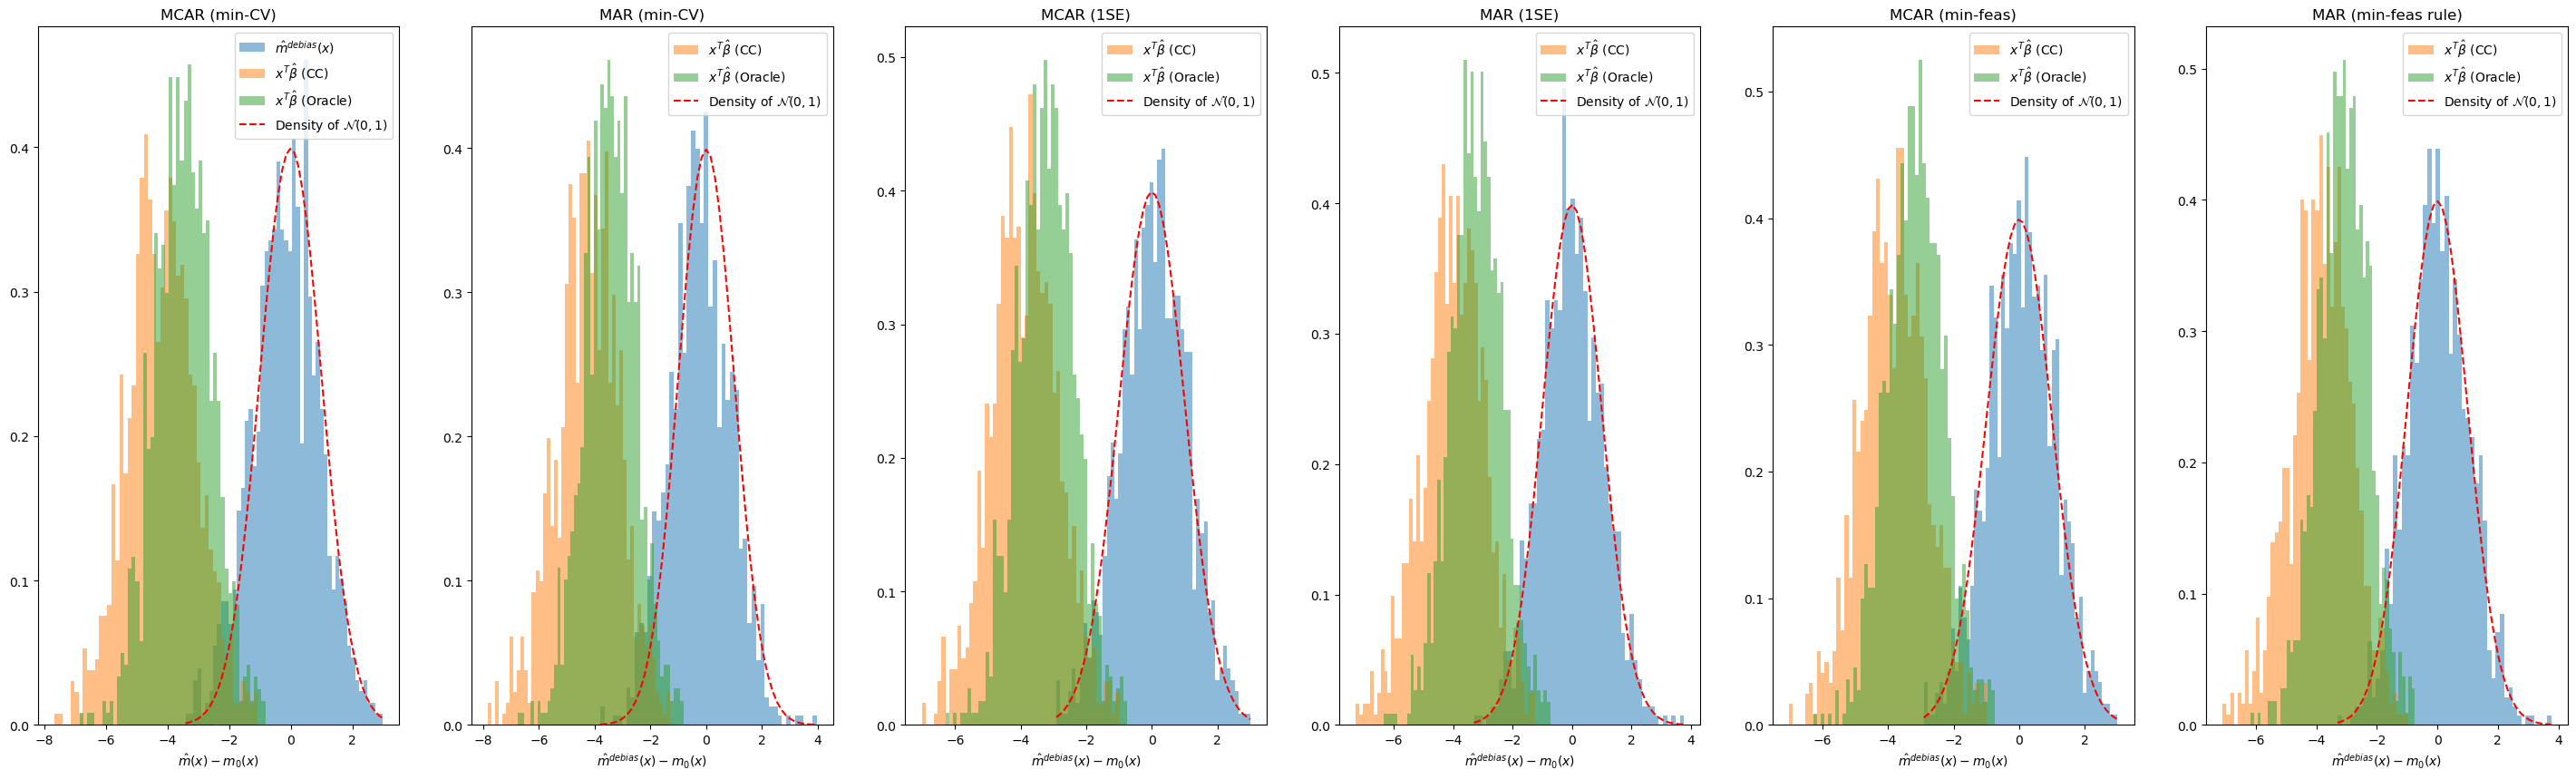

Scenario x4, beta1:



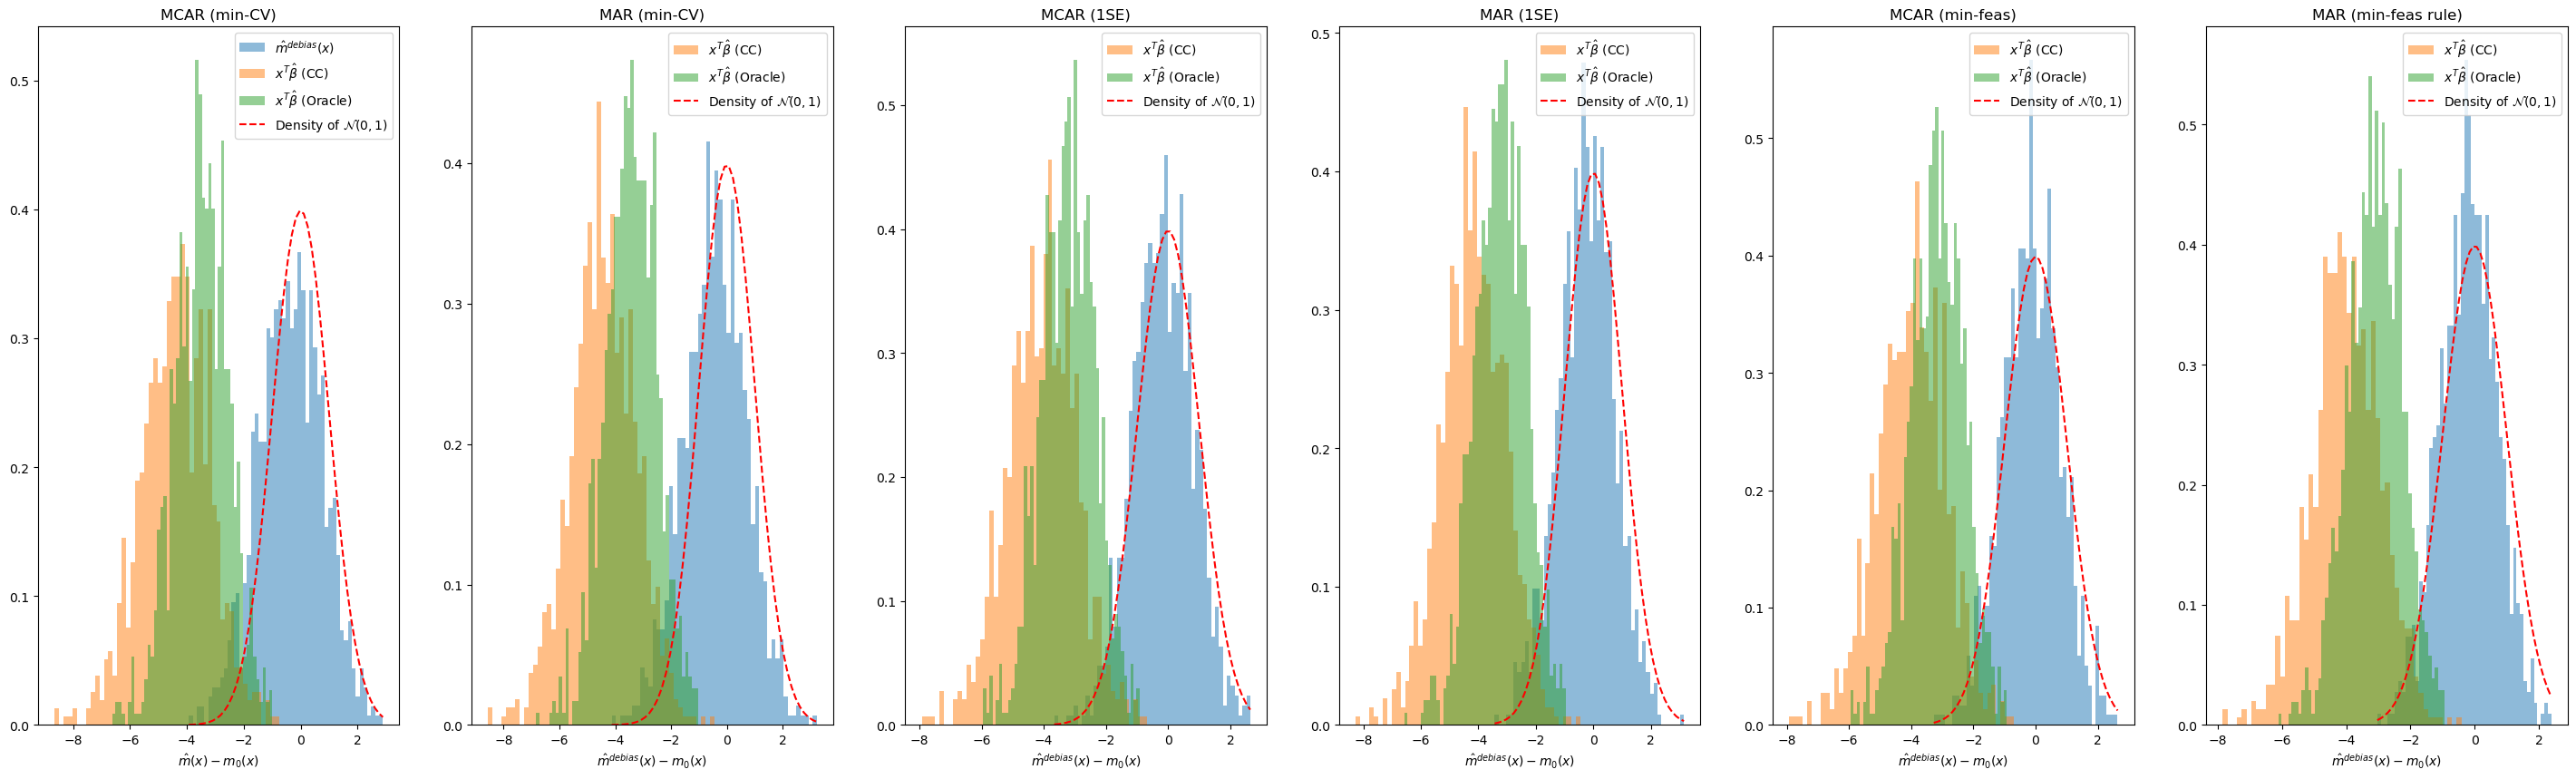

Scenario x4, beta2:



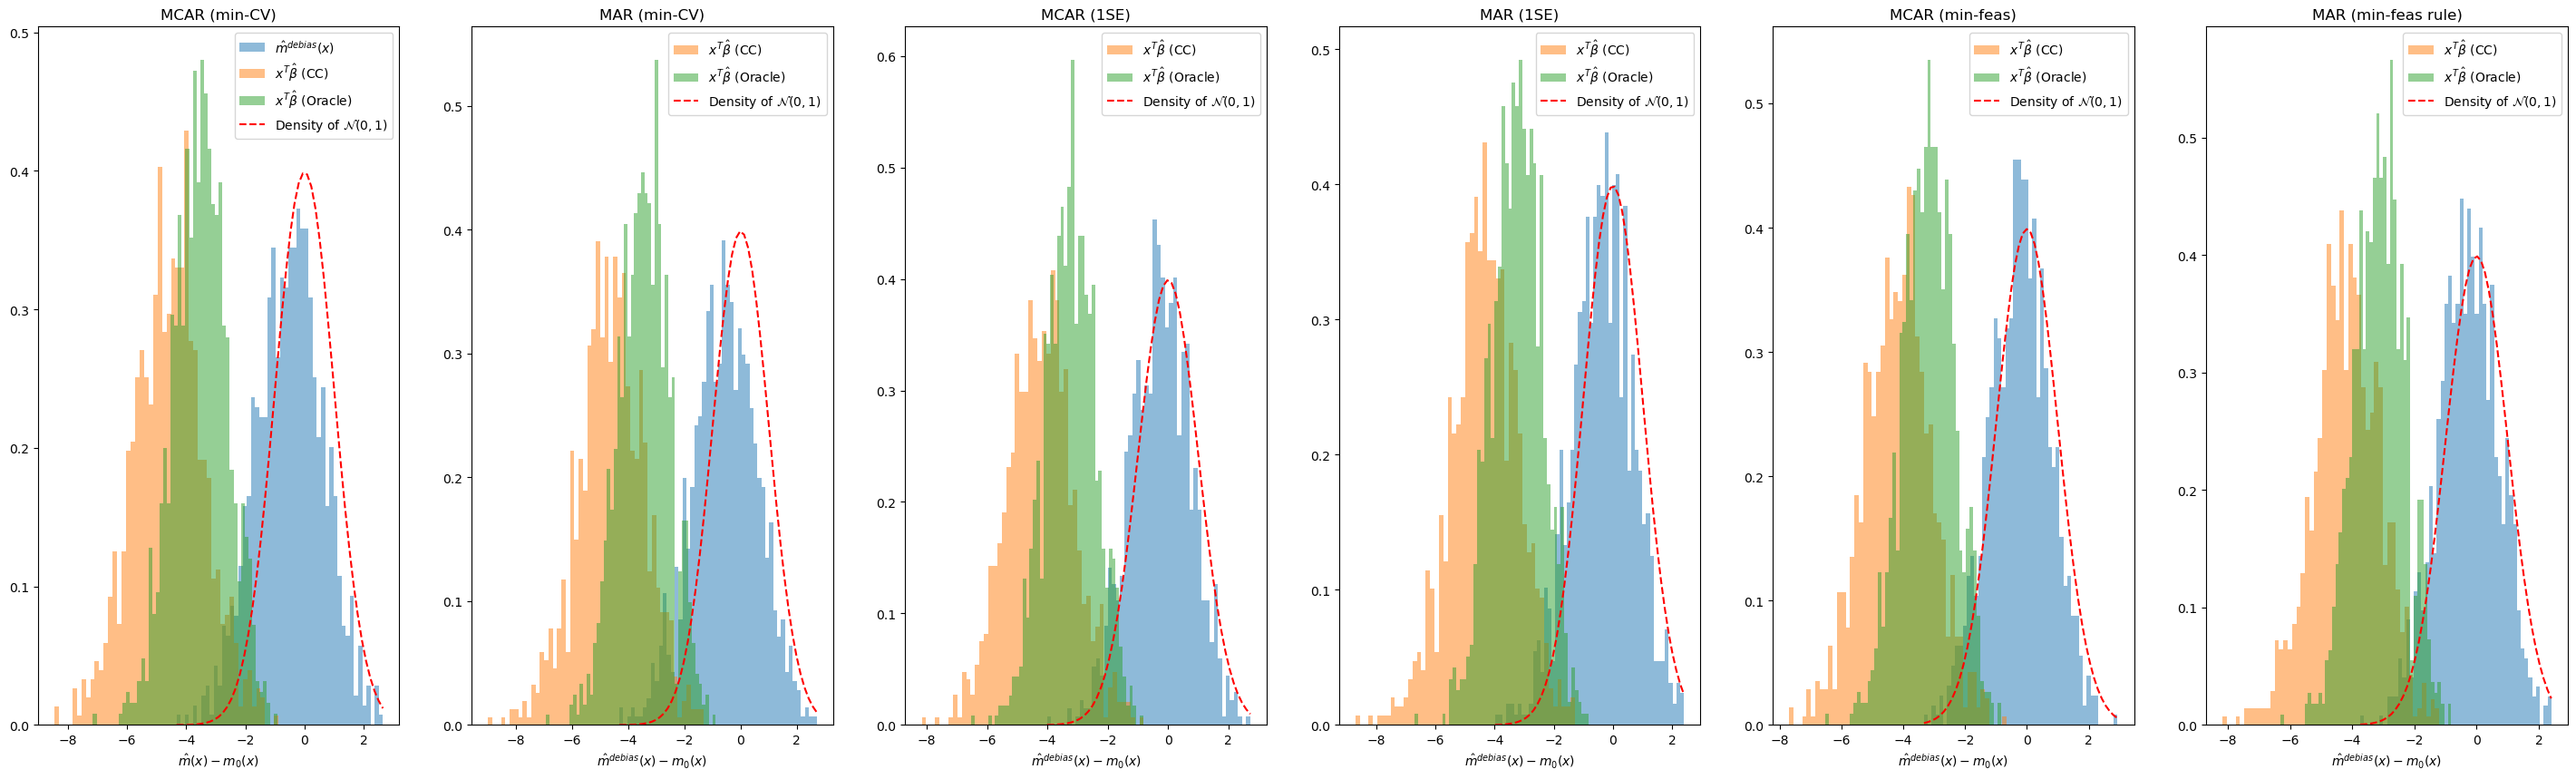

In [38]:
d = 1000
n= 900
B_repeat = 1000
for i in range(5):
    if i == 0:
        ## x0
        x = np.zeros((d,))
        x[0] = 1
    if i == 1:
        ## x1
        x = np.zeros((d,))
        x[0] = 1
        x[1] = 1/2
        x[2] = 1/4
        x[6] = 1/2
        x[7] = 1/8
    if i == 2:
        ## x2
        x = np.zeros((d,))
        x[99] = 1
    if i == 3:
        ## x3
        x = 1/np.linspace(1, d, d)
    if i == 4:
        ## x4
        x = 1/np.linspace(1, d, d)**2
    for k in range(3):
        if k == 0:
            s_beta = 5
            beta_0 = np.zeros((d,))
            beta_0[:s_beta] = np.sqrt(5)
        if k == 1:
            beta_0 = 1/np.sqrt(np.linspace(1, d, d))
            beta_0 = 5*beta_0/np.linalg.norm(beta_0)
        if k == 2:
            beta_0 = 1/np.linspace(1, d, d)
            beta_0 = 5*beta_0/np.linalg.norm(beta_0)

        # True regression function
        m_true = np.dot(x, beta_0)
        
        print('Scenario x'+str(i)+', beta'+str(k)+':\n')
        
        las_pil_res1 = pd.read_csv('./Results/lasso_pilot_Cirsym_d'+str(d)+'_n'+str(n)+'_1000_x'+str(i)+'_beta'+str(k)+'_gauss.csv')
        debl_res1 = pd.read_csv('./Results/debl_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        refit_res1 = pd.read_csv('./Results/refit_Cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        lproj_res1 = pd.read_csv('./Results/lproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        deb_est_1se = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_1se.csv')
        deb_est_mincv = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_mincv.csv')
        deb_est_minfeas = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'_minfeas.csv')
        if (i == 0) or (i == 2):
            rproj_res1 = pd.read_csv('./Results/rproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
        
        
        plt.figure(figsize=(36,10))
        plt.subplot(161)
        plt.hist((deb_est_mincv['m_deb1'] - m_true)/(deb_est_mincv['asym_se1'] * deb_est_mincv['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$\hat{m}^{debias}(x)$')
        plt.hist((las_pil_res1['m_obs1'] - m_true)/(deb_est_mincv['asym_se1'] * deb_est_mincv['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_mincv['asym_se1'] * deb_est_mincv['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_mincv['m_deb1'] - m_true)/(deb_est_mincv['asym_se1'] * deb_est_mincv['sigma_hat1'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
                 label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (min-CV)')
        
        plt.subplot(162)
        plt.hist((deb_est_mincv['m_deb2'] - m_true)/(deb_est_mincv['asym_se2'] * deb_est_mincv['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5)
        plt.hist((las_pil_res1['m_obs2'] - m_true)/(deb_est_mincv['asym_se2'] * deb_est_mincv['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_mincv['asym_se2'] * deb_est_mincv['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_mincv['m_deb2'] - m_true)/(deb_est_mincv['asym_se2'] * deb_est_mincv['sigma_hat2'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (min-CV)')
        
        plt.subplot(163)
        plt.hist((deb_est_1se['m_deb1'] - m_true)/(deb_est_1se['asym_se1'] * deb_est_1se['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5)
        plt.hist((las_pil_res1['m_obs1'] - m_true)/(deb_est_1se['asym_se1'] * deb_est_1se['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_1se['asym_se1'] * deb_est_1se['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_1se['m_deb1'] - m_true)/(deb_est_1se['asym_se1'] * deb_est_1se['sigma_hat1'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1),
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (1SE)')
        
        plt.subplot(164)
        plt.hist((deb_est_1se['m_deb2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5)
        plt.hist((las_pil_res1['m_obs2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_1se['m_deb2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
                 label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (1SE)')
        
        plt.subplot(165)
        plt.hist((deb_est_minfeas['m_deb1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5)
        plt.hist((las_pil_res1['m_obs1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_minfeas['m_deb1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), 
                 color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MCAR (min-feas)')
        
        plt.subplot(166)
        plt.hist((deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5)
        plt.hist((las_pil_res1['m_obs2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (CC)')
        plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
                 bins=50, density=True, alpha=0.5, label=r'$x^T\hat{\beta}$ (Oracle)')
        pts = (deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])
        x_range = np.linspace(np.min(pts), np.max(pts), 50)
        plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
                 label='Density of $\mathcal{N}(0,1)$')
        plt.xlabel(r'$\hat{m}^{debias}(x) - m_0(x)$')
        plt.legend()
        plt.title('MAR (min-feas rule)')
        plt.show()

In [4]:
colors = ['darkslategrey', 'green', 'lawngreen', 'saddlebrown', 'darkorange', 'tan',
          'purple', 'magenta', 'pink', 'blue', 'dodgerblue', 'cyan']

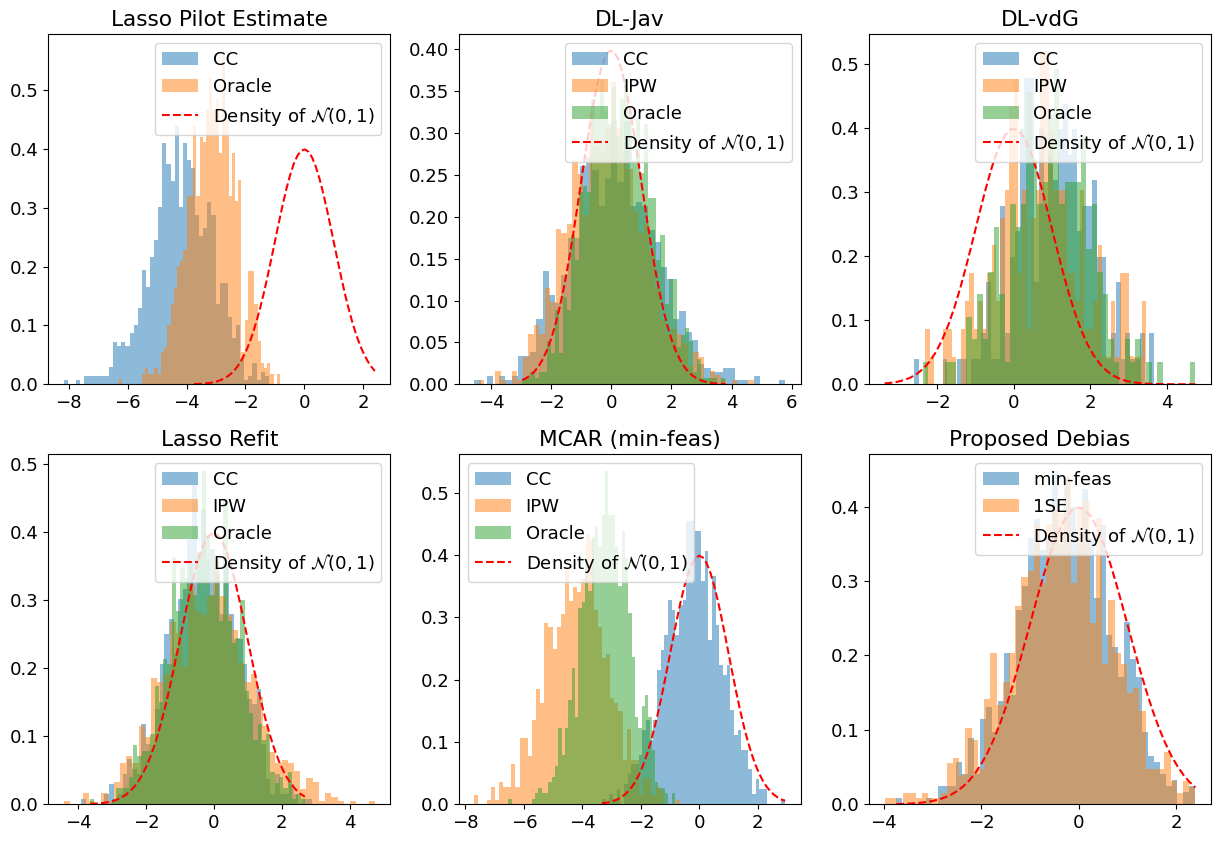

In [58]:
d = 1000
n = 900
B_repeat = 1000
## x1
i = 4
x = 1/np.linspace(1, d, d)**2

## beta2
k = 2
beta_0 = 1/np.linspace(1, d, d)
beta_0 = 5*beta_0/np.linalg.norm(beta_0)


# True regression function
m_true = np.dot(x, beta_0)

rule = '_gauss'
las_pil_res1 = pd.read_csv('./Results/lasso_pilot_Cirsym_d'+str(d)+'_n'+str(n)+'_1000_x'+str(i)+'_beta'+str(k)+rule+'.csv')
if rule == '_gauss':
    rule = ''
lproj_res1 = pd.read_csv('./Results/lproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
debl_res1 = pd.read_csv('./Results/debl_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'.csv')
refit_res1 = pd.read_csv('./Results/refit_Cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'.csv')
deb_est_1se = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_1se.csv')
deb_est_mincv = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_mincv.csv')
deb_est_minfeas = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_minfeas.csv')
    

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.hist((las_pil_res1['m_obs2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.5, label='CC')
plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.5, label='Oracle')
pts = (deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])
x_range = np.linspace(np.min(pts), np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
         label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('Lasso Pilot Estimate')

plt.subplot(232)
plt.hist((debl_res1['m_obs2'] - m_true)/(debl_res1['asym_se_obs2'] * debl_res1['sigma_hat_obs2']), 
         bins=50, density=True, alpha=0.5, label='CC')
plt.hist((debl_res1['m_ipw2'] - m_true)/(debl_res1['asym_se_ipw2'] * debl_res1['sigma_hat_ipw2']), 
         bins=50, density=True, alpha=0.5, label='IPW')
plt.hist((debl_res1['m_full'] - m_true)/(debl_res1['asym_se_full'] * debl_res1['sigma_hat_full']), 
         bins=50, density=True, alpha=0.5, label='Oracle')
pts = (debl_res1['m_full'] - m_true)/(debl_res1['asym_se_full'] * debl_res1['sigma_hat_full'])
x_range = np.linspace(np.min(pts), np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), 
         color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('DL-Jav')

plt.subplot(233)
plt.hist((lproj_res1['m_obs2'] - m_true)/(np.sqrt(lproj_res1['asym_var_obs2']) * lproj_res1['sigma_hat_obs2']), 
         bins=50, density=True, alpha=0.5, label='CC')
plt.hist((lproj_res1['m_ipw2'] - m_true)/(np.sqrt(lproj_res1['asym_var_ipw2']) * lproj_res1['sigma_hat_ipw2']), 
         bins=50, density=True, alpha=0.5, label='IPW')
plt.hist((lproj_res1['m_full'] - m_true)/(np.sqrt(lproj_res1['asym_var_full']) * lproj_res1['sigma_hat_full']), 
         bins=50, density=True, alpha=0.5, label='Oracle')
pts = (lproj_res1['m_full'] - m_true)/(np.sqrt(lproj_res1['asym_var_full']) * lproj_res1['sigma_hat_full'])
x_range = np.linspace(np.min(pts)-1, np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1),
         color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('DL-vdG')

plt.subplot(234)
plt.hist((refit_res1['m_obs2'] - m_true)/(refit_res1['asym_se_obs2'] * refit_res1['sigma_hat_obs2']), 
         bins=50, density=True, alpha=0.5, label='CC')
plt.hist((debl_res1['m_ipw2'] - m_true)/(debl_res1['asym_se_ipw2'] * debl_res1['sigma_hat_ipw2']), 
         bins=50, density=True, alpha=0.5, label='IPW')
plt.hist((refit_res1['m_full'] - m_true)/(refit_res1['asym_se_full'] * refit_res1['sigma_hat_full']), 
         bins=50, density=True, alpha=0.5, label='Oracle')
pts = (refit_res1['m_full'] - m_true)/(refit_res1['asym_se_full'] * refit_res1['sigma_hat_full'])
x_range = np.linspace(np.min(pts), np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
         label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('Lasso Refit')

plt.subplot(235)
plt.hist((deb_est_minfeas['m_deb1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
         bins=50, density=True, alpha=0.5, label='CC')
plt.hist((las_pil_res1['m_obs1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
         bins=50, density=True, alpha=0.5, label='IPW')
plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1']), 
         bins=50, density=True, alpha=0.5, label='Oracle')
pts = (deb_est_minfeas['m_deb1'] - m_true)/(deb_est_minfeas['asym_se1'] * deb_est_minfeas['sigma_hat1'])
x_range = np.linspace(np.min(pts), np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), 
         color='red', linestyle='dashed', label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('MCAR (min-feas)')

plt.subplot(236)
plt.hist((deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.5, label='min-feas')
plt.hist((deb_est_1se['m_deb2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2']), 
         bins=50, density=True, alpha=0.5, label='1SE')
pts = (deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])
x_range = np.linspace(np.min(pts), np.max(pts), 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', 
         label='Density of $\mathcal{N}(0,1)$')
plt.legend()
plt.title('Proposed Debias')
plt.show()

### Selected Figures

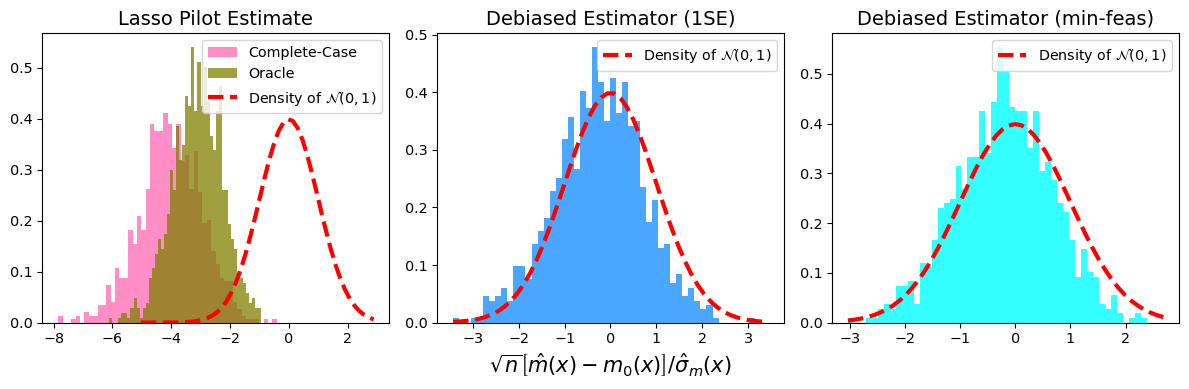

In [8]:
d = 1000
n = 900
B_repeat = 1000
## x4
i = 4
x = 1/np.linspace(1, d, d)**2

## beta 0
# k = 0
# s_beta = 5
# beta_0 = np.zeros((d,))
# beta_0[:s_beta] = np.sqrt(5)

## beta 1
k = 1
beta_0 = 1/np.sqrt(np.linspace(1, d, d))
beta_0 = 5*beta_0/np.linalg.norm(beta_0)


# True regression function
m_true = np.dot(x, beta_0)

rule = '_gauss'
las_pil_res1 = pd.read_csv('./Results/lasso_pilot_Cirsym_d'+str(d)+'_n'+str(n)+'_1000_x'+str(i)+'_beta'+str(k)+rule+'.csv')
if rule == '_gauss':
    rule = ''
lproj_res1 = pd.read_csv('./Results/lproj_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+'.csv')
debl_res1 = pd.read_csv('./Results/debl_cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'.csv')
refit_res1 = pd.read_csv('./Results/refit_Cirsym_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'.csv')
deb_est_1se = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_1se.csv')
deb_est_mincv = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_mincv.csv')
deb_est_minfeas = pd.read_csv('./Results/DebiasProg_Cirsym_cov_homoerr_d'+str(d)+'_n'+str(n)+'_x'+str(i)+'_beta'+str(k)+rule+'_minfeas.csv')
    

plt.rcParams.update({'font.size': 10.3})
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hist((las_pil_res1['m_obs2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.75, label='Complete-Case', color='hotpink')
plt.hist((las_pil_res1['m_full'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.75, label='Oracle', color='olive')
pts = (deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])
x_range = np.linspace(np.min(pts)-2, np.max(pts)+0.5, 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', linewidth=3,
         label='Density of $\mathcal{N}(0,1)$')
plt.legend(loc='upper right')
plt.title('Lasso Pilot Estimate', fontsize=14)

plt.subplot(132)
plt.hist((deb_est_1se['m_deb2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2']), 
         bins=50, density=True, alpha=0.8, color='dodgerblue')
pts = (deb_est_1se['m_deb2'] - m_true)/(deb_est_1se['asym_se2'] * deb_est_1se['sigma_hat2'])
x_range = np.linspace(np.min(pts), np.max(pts)+0.3, 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', linewidth=3,
         label='Density of $\mathcal{N}(0,1)$')
plt.legend(loc='upper right')
plt.xlabel(r'$\sqrt{n}\left[\hat{m}(x) - m_0(x) \right]/\hat{\sigma}_m(x)$', fontsize=15)
plt.title('Debiased Estimator (1SE)', fontsize=14)

plt.subplot(133)
plt.hist((deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2']), 
         bins=50, density=True, alpha=0.8, color='cyan')
pts = (deb_est_minfeas['m_deb2'] - m_true)/(deb_est_minfeas['asym_se2'] * deb_est_minfeas['sigma_hat2'])
x_range = np.linspace(np.min(pts), np.max(pts)+0.3, 50)
plt.plot(x_range, scipy.stats.norm.pdf(x_range, 0, 1), color='red', linestyle='dashed', linewidth=3,
         label='Density of $\mathcal{N}(0,1)$')
plt.legend(loc='upper right')
plt.title('Debiased Estimator (min-feas)', fontsize=14)

# fig.text(0.38, -0.05, r'$\sqrt{n}\left[\hat{m}(x) - m_0(x) \right]/\hat{\sigma}_m(x)$', fontsize=13)
plt.tight_layout()
plt.savefig('./Figures/cirsym_lasso_bias_expl_x'+str(i)+'_beta'+str(k)+'.pdf', bbox_inches='tight')